## CAPSTONE_1: INTERMITTENT DEMAND PREDICTION USING MACHINE LEARNING


#### DATA UNDERSTANDING:

The data primarily captures about part sales, usage patterns and service operations over a specific period of time.

Use the files.upload() function to upload your Excel files directly to Colab.

First, we combine the data. Then, followed by we are sorting the combined data based on invoice date.

In [ ]:
##  CAPSTONE_1: INTERMITTENT DEMAND PREDICTION USING ML

In [ ]:
from google.colab import files
uploaded = files.upload()  # A file picker will appear to upload your files

Saving ADISHAKTI SALES JAN AND FEB 2024.xlsx to ADISHAKTI SALES JAN AND FEB 2024.xlsx
Saving ADISHAKTI SALES JUNE TO AUG 2024.xlsx to ADISHAKTI SALES JUNE TO AUG 2024.xlsx
Saving ADISHAKTI SALES MARCH TO MAY 2024.xlsx to ADISHAKTI SALES MARCH TO MAY 2024.xlsx
Saving APR 2022 ADI BLR.xlsx to APR 2022 ADI BLR.xlsx
Saving APR 2023 ADI BLR.xlsx to APR 2023 ADI BLR.xlsx
Saving AUG 2022 ADI BLR.xlsx to AUG 2022 ADI BLR.xlsx
Saving AUG 2023 ADI BLR.xlsx to AUG 2023 ADI BLR.xlsx
Saving DEC 2022 ADI BLR.xlsx to DEC 2022 ADI BLR.xlsx
Saving DEC 2023 ADI BLR.xlsx to DEC 2023 ADI BLR.xlsx
Saving FEB 2022 ADI BLR.xlsx to FEB 2022 ADI BLR.xlsx
Saving FEB 2023 ADI BLR.xlsx to FEB 2023 ADI BLR.xlsx
Saving JAN 2022 ADI BLR.xlsx to JAN 2022 ADI BLR.xlsx
Saving JAN 2023 ADI BLR.xlsx to JAN 2023 ADI BLR.xlsx
Saving JULY 2022 ADI BLR.xlsx to JULY 2022 ADI BLR.xlsx
Saving JULY 2023 ADI BLR.xlsx to JULY 2023 ADI BLR.xlsx
Saving JUNE 2022 ADI BLR.xlsx to JUNE 2022 ADI BLR.xlsx
Saving JUNE 2023 ADI BLR.xlsx to

1. import required libraries.
   pandas: Used for reading, manipulating, and saving Excel files. os: Helps to navigate and list files in the specified folder.

2. Specify the folder path
   folder_path: The directory where all the uploaded Excel files are stored. dataframes: An empty list to store the content of each Excel file as a pandas DataFrame.

3. Read and process each file
   Loops through all files in the folder and processes only .xlsx files. Reads each file into a pandas DataFrame and stores it in the dataframes list.

4. Combine all dataframes
   Combines all the DataFrames in the dataframes list into a single DataFrame. ignore_index=True ensures the row indices are reset for the combined dataset.

5. Save the combined data
   Saves the combined dataset as an Excel file named combined_data.xlsx. index=False prevents adding an extra index column in the saved file.

6.Download the combined file
  Allows you to download the combined dataset file (combined_data.xlsx) to your local computer.

In [ ]:
import pandas as pd
import os

folder_path = "/content/"  # Location of uploaded files
dataframes = []

for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path)
        dataframes.append(df)

combined_data = pd.concat(dataframes, ignore_index=True)
combined_data.to_excel("combined_data.xlsx", index=False)
print("Combined dataset saved as combined_data.xlsx")

from google.colab import files
files.download("combined_data.xlsx")

# It loops through all the uploaded Excel files in the folder.
# Reads each Excel file into a DataFrame.
# Combines all DataFrames into one.
# Saves the combined dataset as a new Excel file.
# Lets you download the file to our computer.

Combined dataset saved as combined_data.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the combined_data.xlsx file

Saving combined_data (1).xlsx to combined_data (1).xlsx


In [ ]:
import os
print(os.listdir("/content/"))  # Check if combined_data.xlsx appears in the list

['.config', 'APR 2022 ADI BLR.xlsx', 'ADISHAKTI SALES JAN AND FEB 2024.xlsx', 'SEP 2022 ADI BLR.xlsx', 'JAN 2022 ADI BLR.xlsx', 'JULY 2022 ADI BLR.xlsx', 'NOV 2023 ADI BLR.xlsx', 'MARCH 2023 ADI BLR.xlsx', 'OCT 2022 ADI BLR.xlsx', 'JAN 2023 ADI BLR.xlsx', 'MAY 2022 ADI BLR.xlsx', 'NOV 2022 ADI BLR.xlsx', 'DEC 2023 ADI BLR.xlsx', 'JULY 2023 ADI BLR.xlsx', 'APR 2023 ADI BLR.xlsx', 'ADISHAKTI SALES JUNE TO AUG 2024.xlsx', 'JUNE 2022 ADI BLR.xlsx', 'MARCH 2022 ADI BLR.xlsx', 'AUG 2023 ADI BLR.xlsx', 'AUG 2022 ADI BLR.xlsx', 'FEB 2023 ADI BLR.xlsx', 'OCT 2023 ADI BLR.xlsx', 'DEC 2022 ADI BLR.xlsx', 'MAY 2023 ADI BLR.xlsx', 'combined_data (1).xlsx', 'combined_data.xlsx', 'ADISHAKTI SALES MARCH TO MAY 2024.xlsx', 'SEP 2023 ADI BLR.xlsx', 'FEB 2022 ADI BLR.xlsx', 'JUNE 2023 ADI BLR.xlsx', 'sample_data']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

combined_data = pd.read_excel("/content/drive/My Drive/IntermittentDemand/combined_data (1).xlsx")

Now, sorting the data by invoice date.

In [ ]:
import pandas as pd

# Convert 'Invoice Date' column to datetime format
# Errors='coerce' will convert invalid dates to NaT (Not a Time)
combined_data['Invoice Date'] = pd.to_datetime(combined_data['Invoice Date'], errors='coerce')

# Check for missing or invalid dates
missing_dates = combined_data[combined_data['Invoice Date'].isnull()]
if not missing_dates.empty:
    print("Rows with invalid or missing Invoice Date:")
    print(missing_dates)

# Drop rows with missing 'Invoice Date' if necessary
combined_data = combined_data.dropna(subset=['Invoice Date'])

# Sort the data by 'Invoice Date'
combined_data = combined_data.sort_values(by='Invoice Date')

# Reset the index after sorting
combined_data.reset_index(drop=True, inplace=True)

# Save the sorted dataset
combined_data.to_excel("sorted_combined_data.xlsx", index=False)
print("Data sorted by Invoice Date and saved as sorted_combined_data.xlsx")

# Download the sorted file
from google.colab import files
files.download("sorted_combined_data.xlsx")

Data sorted by Invoice Date and saved as sorted_combined_data.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the sorted data

# Load the necessary libraries
import pandas as pd
import numpy as np


sorted_combined_data = pd.read_excel("/content/drive/My Drive/IntermittentDemand/sorted_combined_data (2).xlsx")

# Display the first few rows
print(sorted_combined_data.head())

  TM Fiscal Year Month Name      Month Partner Type  \
0        2021-22    January  2022 / 01       Dealer   
1        2021-22    January  2022 / 01       Dealer   
2        2021-22    January  2022 / 01       Dealer   
3        2021-22    January  2022 / 01       Dealer   
4        2021-22    January  2022 / 01       Dealer   

                           Dealer  Dealer Code  \
0  ADISHAKTI CARS PVT LTD-3007720      3007720   
1  ADISHAKTI CARS PVT LTD-3007720      3007720   
2  ADISHAKTI CARS PVT LTD-3007720      3007720   
3  ADISHAKTI CARS PVT LTD-3007720      3007720   
4  ADISHAKTI CARS PVT LTD-3007720      3007720   

                         Division  Region                       JC #  \
0  3007720-Sv&Pa-Bengaluru-AtiCar  South1  JC-AtiCar-BP1-2122-010818   
1  3007720-Sv&Pa-Bengaluru-AtiCar  South1  JC-AtiCar-BP1-2122-010800   
2  3007720-Sv&Pa-Bengaluru-AtiCar  South1  JC-AtiCar-BP1-2122-010800   
3  3007720-Sv&Pa-Bengaluru-AtiCar  South1  JC-AtiCar-BP1-2122-010800   
4  30077

# STEP 1: DATA PREPROCESSING:

Data preprocessing was performed to clean and structure the raw data for further analysis. This step includes the below.

1. Check for Duplicates and remove
2. Handling Missing Values
3. Check and Convert datatypes
4. Handling outliers

These transformations ensured consistency and reliability, forming a solid foundation for feature engineering and accurate demand forecasting.

In [ ]:
# Data Preprocessing Steps:

In [ ]:
# step1: Check for Duplicates and remove

# Check for duplicate rows
print(f"Total Duplicates: {sorted_combined_data.duplicated().sum()}")

# Remove duplicates if any
sorted_combined_data = sorted_combined_data.drop_duplicates().reset_index(drop=True)

Total Duplicates: 0


In [ ]:
# step2: Handling Missing Values
# step2.1: Check for missing values

# Check for missing values in each column
print(sorted_combined_data.isnull().sum())

TM Fiscal Year            0
Month Name                0
Month                     0
Partner Type              0
Dealer                    0
Dealer Code               0
Division                  0
Region                    0
JC #                      0
Job Card Created Date     0
JC Open Days              0
Job Card Closed Date      0
Service Type              0
KMs Run                  28
Part No                   0
Part Desc                 0
Category                  0
TM Part Indicator         0
Sold Qty                  0
TM Spares Amount          0
Spares Amount             0
PPL                       0
PL                        0
LOB                       0
Invoice Status            0
Invoice Number            0
Invoice Date              0
dtype: int64


In [ ]:
# Display missing values count
print(sorted_combined_data.isnull().sum())

# Display rows where numerical columns have missing values
print(sorted_combined_data[sorted_combined_data.isnull().any(axis=1)])

TM Fiscal Year            0
Month Name                0
Month                     0
Partner Type              0
Dealer                    0
Dealer Code               0
Division                  0
Region                    0
JC #                      0
Job Card Created Date     0
JC Open Days              0
Job Card Closed Date      0
Service Type              0
KMs Run                  28
Part No                   0
Part Desc                 0
Category                  0
TM Part Indicator         0
Sold Qty                  0
TM Spares Amount          0
Spares Amount             0
PPL                       0
PL                        0
LOB                       0
Invoice Status            0
Invoice Number            0
Invoice Date              0
dtype: int64
       TM Fiscal Year Month Name      Month Partner Type  \
173976        2023-24    January  2024 / 01       Dealer   
173977        2023-24    January  2024 / 01       Dealer   
173978        2023-24    January  2024 / 01       D

**Output Observation:**

In our specific case, we only need to handle KMs Run, because:

No other numerical columns have missing values (so we don't need to fill them).
No categorical columns have missing values, so there’s nothing to fill there either.
Our dataset is already clean except for KMs Run, so we don’t have to do a general mean/median/mode filling for all columns.

From the output,

The only column with missing values is KMs Run (28 missing values).
No other columns have missing values.
The dataset consists of 27 columns and some records with missing values in KMs Run.

To handle the Missing KMs Run values:

If KMs Run represents distance traveled, a missing value of 0 might mean the vehicle was not used.
If missing values are due to an error in data entry, replacing them with the mean or median might be better.

In [ ]:
# step2.2: Investigate Missing values in KMs Run

# Check if missing KMs Run is related to other columns
print(sorted_combined_data[sorted_combined_data['KMs Run'].isnull()])

       TM Fiscal Year Month Name      Month Partner Type  \
173976        2023-24    January  2024 / 01       Dealer   
173977        2023-24    January  2024 / 01       Dealer   
173978        2023-24    January  2024 / 01       Dealer   
202025        2024-25      April  2024 / 04       Dealer   
202055        2024-25      April  2024 / 04       Dealer   
202056        2024-25      April  2024 / 04       Dealer   
202057        2024-25      April  2024 / 04       Dealer   
202098        2024-25      April  2024 / 04       Dealer   
202099        2024-25      April  2024 / 04       Dealer   
202100        2024-25      April  2024 / 04       Dealer   
202101        2024-25      April  2024 / 04       Dealer   
202102        2024-25      April  2024 / 04       Dealer   
202103        2024-25      April  2024 / 04       Dealer   
202104        2024-25      April  2024 / 04       Dealer   
202105        2024-25      April  2024 / 04       Dealer   
202106        2024-25      April  2024 /

In [ ]:
# step2.3: Case 1: If missing values mean 'not used' (zero is logical)
sorted_combined_data['KMs Run'].fillna(0, inplace=True)

<ipython-input-14-b988459f84bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sorted_combined_data['KMs Run'].fillna(0, inplace=True)


In [ ]:
# step2.4: Case 2: If missing values are random & should be estimated
# Use median (better than mean for skewed data):
median_kms = sorted_combined_data['KMs Run'].median()
sorted_combined_data['KMs Run'].fillna(median_kms, inplace=True)

<ipython-input-15-e4f22071b6fb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sorted_combined_data['KMs Run'].fillna(median_kms, inplace=True)


In [ ]:
# step2.5: Verify if missing values are handled
print(sorted_combined_data.isnull().sum())

TM Fiscal Year           0
Month Name               0
Month                    0
Partner Type             0
Dealer                   0
Dealer Code              0
Division                 0
Region                   0
JC #                     0
Job Card Created Date    0
JC Open Days             0
Job Card Closed Date     0
Service Type             0
KMs Run                  0
Part No                  0
Part Desc                0
Category                 0
TM Part Indicator        0
Sold Qty                 0
TM Spares Amount         0
Spares Amount            0
PPL                      0
PL                       0
LOB                      0
Invoice Status           0
Invoice Number           0
Invoice Date             0
dtype: int64


In [ ]:
# step3: Check and Convert datatypes:
# step3.1: Check current datatypes:

print(sorted_combined_data.dtypes)

TM Fiscal Year                   object
Month Name                       object
Month                            object
Partner Type                     object
Dealer                           object
Dealer Code                       int64
Division                         object
Region                           object
JC #                             object
Job Card Created Date    datetime64[ns]
JC Open Days                      int64
Job Card Closed Date     datetime64[ns]
Service Type                     object
KMs Run                         float64
Part No                          object
Part Desc                        object
Category                         object
TM Part Indicator                object
Sold Qty                          int64
TM Spares Amount                float64
Spares Amount                   float64
PPL                              object
PL                               object
LOB                              object
Invoice Status                   object


All datatypes are correct.so, no further changes needed.

Now we should handle outliers before filtering intermittent demand to ensure extreme values dont distort our variability calculations(Coefficient of variation - CV)

However, not all outliers should be removed because:

**In intermittent demand forecasting, some variations are normal. If we remove all high peaks, we might lose valuable demand patterns.**

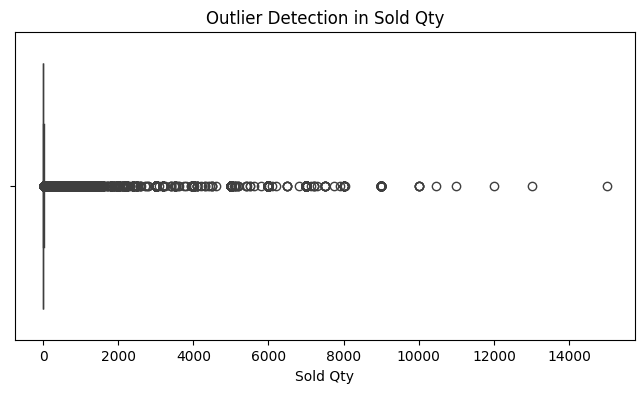

In [ ]:
# step4: Handling outliers:
# step4.1: Check for Outliers in sold Qty( Use a box plot to visualize extreme values in sold qty)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=sorted_combined_data['Sold Qty'])
plt.title("Outlier Detection in Sold Qty")
plt.show()

**Analysis of our Boxplot:**

The black box in the middle represents most of the data (interquartile range - IQR).
The horizontal line in the box is the median (Q2).
The whiskers (vertical lines) show the range of typical values.
The dots outside the whiskers are considered outliers.
From our plot:

Most values are within 0 to ~1500 units.

Many extreme outliers exist beyond 2000, 6000, 10,000, 14,000.

Since intermittent demand includes variability, instead of removing all high peaks, we should:

Tried to Use a more relaxed IQR threshold to remove only extreme errors.
Keep high variability if it’s meaningful to the business.

**SOLUTION:**

1. Do Not Use IQR for Intermittent Demand.
2. Since intermittent demand naturally has variability, using IQR for outlier removal is too aggressive.
3. Instead, we should:
    - Revert to the original Sold Qty values (before applying IQR filtering).
    - Use all available data for intermittent demand detection instead of removing high demand points.

In [ ]:
# Filtering the data required for intermittent demand based on coefficient of variation(CV):

In [ ]:
# Filtering the data required for intermittent demand:

# Group by 'Part No' and calculate demand statistics
demand_stats = sorted_combined_data.groupby('Part No')['Sold Qty'].agg(['mean', 'std']).reset_index()

# Compute Coefficient of Variation (CV)
demand_stats['CV'] = demand_stats['std'] / demand_stats['mean']

# Set threshold for intermittent demand
cv_threshold = 1  # Parts with CV > 1 are considered intermittent demand
intermittent_parts = demand_stats[demand_stats['CV'] > cv_threshold]['Part No']

# Keep only rows where 'Part No' is intermittent
intermittent_data = sorted_combined_data[sorted_combined_data['Part No'].isin(intermittent_parts)]

# Save the filtered dataset
intermittent_data.to_excel('filtered_intermittent_data.xlsx', index=False)

print("Intermittent demand filtering complete!")

Intermittent demand filtering complete!


In [ ]:
# Download the sorted file
from google.colab import files
files.download("filtered_intermittent_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_path = "/content/drive/My Drive/IntermittentDemand/filtered_intermittent_data (2).xlsx"
print(" File saved to Google Drive:", file_path)

 File saved to Google Drive: /content/drive/My Drive/IntermittentDemand/filtered_intermittent_data (2).xlsx


# STEP 2: EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) was carried out to better understand the overall structure, trends, and patterns in the raw dataset. The goal of this step was to uncover meaningful insights related to part-level sales behavior, demand distribution, and seasonal variations.


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# EXPLORATORY DATA ANALYSIS

In [ ]:
# STEP1: SUMMARY STATISTICS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP1: SUMMARY STATISTICS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/drive/My Drive/IntermittentDemand/filtered_intermittent_data (2).xlsx"
df = pd.read_excel(file_path)

# Display basic info
print("Dataset Info:\n")
df.info()

# Summary statistics
print("\nSummary Statistics:\n")
print(df.describe())

# Check missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Check duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Display first few rows
df.head()
# Display basic info
print("Dataset Info:\n")
df.info()

# Summary statistics
print("\nSummary Statistics:\n")
print(df.describe())

# Check missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Check duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Display first few rows
df.head()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39857 entries, 0 to 39856
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TM Fiscal Year         39857 non-null  object        
 1   Month Name             39857 non-null  object        
 2   Month                  39857 non-null  object        
 3   Partner Type           39857 non-null  object        
 4   Dealer                 39857 non-null  object        
 5   Dealer Code            39857 non-null  int64         
 6   Division               39857 non-null  object        
 7   Region                 39857 non-null  object        
 8   JC #                   39857 non-null  object        
 9   Job Card Created Date  39857 non-null  datetime64[ns]
 10  JC Open Days           39857 non-null  int64         
 11  Job Card Closed Date   39857 non-null  datetime64[ns]
 12  Service Type           39857 non-null  object

,TM Fiscal Year,Month Name,Month,Partner Type,Dealer,Dealer Code,Division,Region,JC #,Job Card Created Date,...,TM Part Indicator,Sold Qty,TM Spares Amount,Spares Amount,PPL,PL,LOB,Invoice Status,Invoice Number,Invoice Date
0,2021-22,January,2022 / 01,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-010800,2021-12-31 19:02:20,...,Y,260,663.66040,663.66040,Nano,Nano CX,Small Cars,New,IATIEN2122011414,2022-01-01
1,2021-22,January,2022 / 01,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-010800,2021-12-31 19:02:20,...,Y,1100,3356.85900,3356.85900,Nano,Nano CX,Small Cars,New,IATIEN2122011414,2022-01-01
2,2021-22,January,2022 / 01,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-010800,2021-12-31 19:02:20,...,Y,2100,4586.19000,4586.19000,Nano,Nano CX,Small Cars,New,IATIEN2122011414,2022-01-01
3,2021-22,January,2022 / 01,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-010800,2021-12-31 19:02:20,...,Y,1225,1530.20875,1530.20875,Nano,Nano CX,Small Cars,New,IATIEN2122011414,2022-01-01
4,2021-22,January,2022 / 01,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-010800,2021-12-31 19:02:20,...,Y,2400,1586.44800,1586.44800,Nano,Nano CX,Small Cars,New,IATIEN2122011414,2022-01-01


**1. Dataset Overview**

- Total records: 39,857
- Total columns: 27
- Data types:
    -  Numerical (9): Dealer Code, JC Open Days, KMs Run, Sold Qty, TM Spares Amount, Spares Amount, etc.
    - Datetime (3): Job Card Created Date, Job Card Closed Date, Invoice Date
    - Categorical (15+): Dealer, Region, Category, LOB, Invoice Status, etc.
- No missing values!
    - Good data quality → No NaN values in any column.
- No duplicate rows!
    - df.duplicated().sum() = 0 → All records are unique.

**2. Key Statistical Insights**

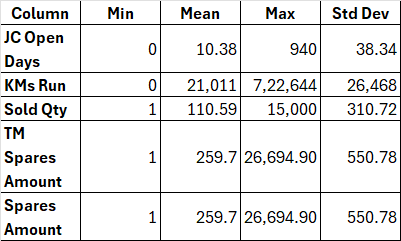

**3.  Important Observations**

   -  JC Open Days (Job Card Open Days) has a huge range (0 to 940 days), meaning some repairs or services take excessively long.
   - KMs Run has extreme values, with some vehicles running more than 700,000 KMs. This might indicate incorrect entries or outliers.
   - Sold Qty ranges from 1 to 15,000, suggesting some parts are high-demand bulk sales, while others are rarely sold.
   - TM Spares Amount and Spares Amount are identical (confirming no profit margin) and range from ₹1 to ₹26,694.90.

4.  Potential Issues to Investigate

   - High variance in JC Open Days → Some service jobs stay open for months (max: 940 days). Need to check why.
   - Possible outliers in KMs Run → Any vehicle crossing 700,000 KMs needs investigation.
   - Bulk sales in Sold Qty → The mean is 110 but the max is 15,000, meaning some products are ordered in huge volumes.



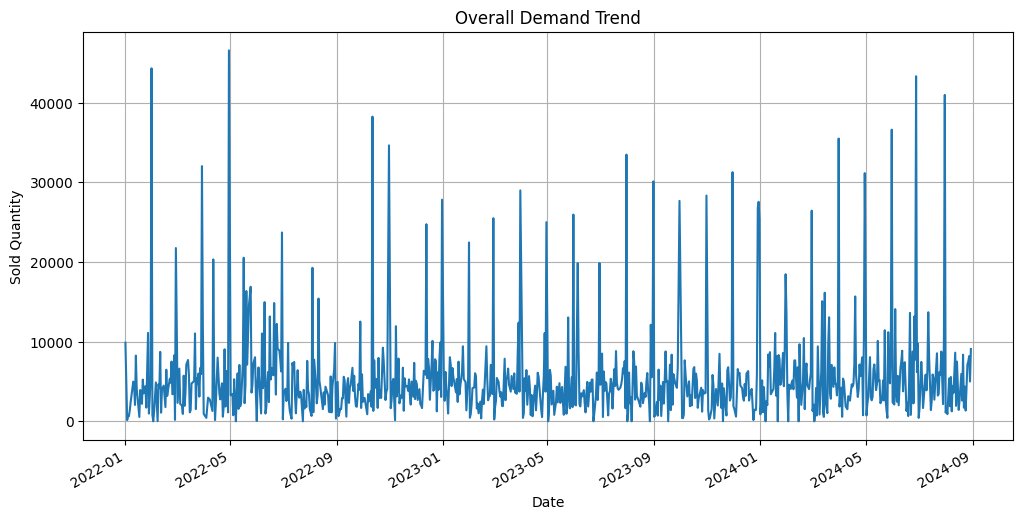


Top 5 Highest Selling Products:
 Part No
8855AXLT0032    1250786
8855AXLT0068    1171273
8855AXLT0072     625776
8855AXLT0002     362643
8855AXLT0065     191753
Name: Sold Qty, dtype: int64

Bottom 5 Lowest Selling Products:
 Part No
15950500210     11
254701108204    21
287140106705    28
8855AXLT0103    60
542440106501    61
Name: Sold Qty, dtype: int64


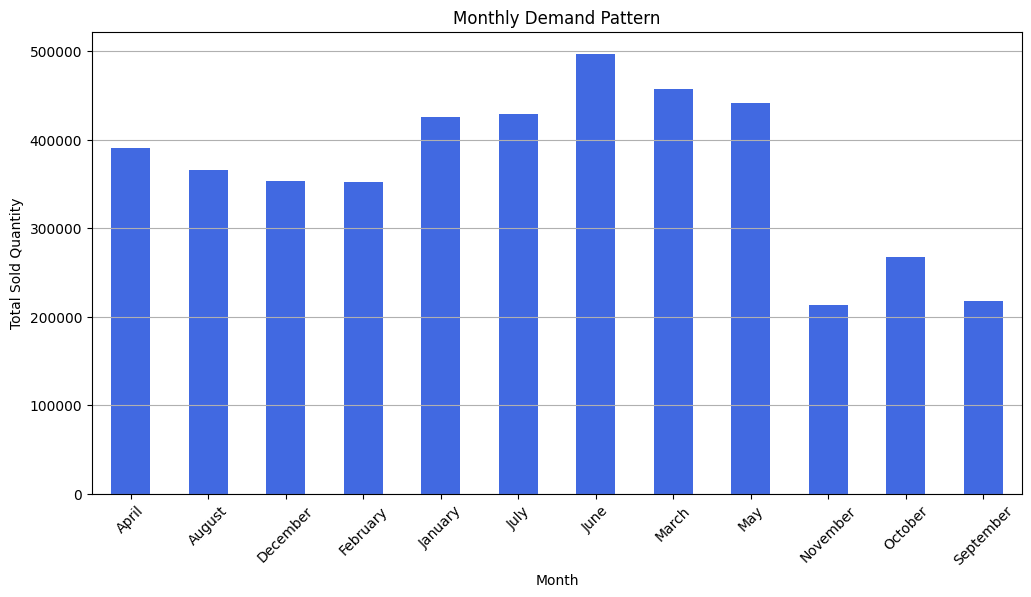

In [ ]:
#STEP2:DEMAND PATTERN ANALYSIS

# Convert 'Invoice Date' to datetime format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Plot overall demand trend over time
plt.figure(figsize=(12, 6))
df.groupby('Invoice Date')['Sold Qty'].sum().plot()
plt.title('Overall Demand Trend')
plt.xlabel('Date')
plt.ylabel('Sold Quantity')
plt.grid()
plt.show()

# Top 5 highest-selling products
top_5_products = df.groupby('Part No')['Sold Qty'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Highest Selling Products:\n", top_5_products)

# Bottom 5 lowest-selling products
bottom_5_products = df.groupby('Part No')['Sold Qty'].sum().sort_values(ascending=True).head(5)
print("\nBottom 5 Lowest Selling Products:\n", bottom_5_products)

# Monthly demand trend
plt.figure(figsize=(12, 6))
df.groupby('Month Name')['Sold Qty'].sum().plot(kind='bar', color='royalblue')
plt.title('Monthly Demand Pattern')
plt.xlabel('Month')
plt.ylabel('Total Sold Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Our demand analysis provides valuable insights into sales trends, high/low-demand products, and seasonal patterns.
Below is a structured summary:

**1. Overall Demand Trend**

    - The time-series plot of Sold Qty over Invoice Date shows high fluctuation in demand.
    - There are multiple sharp spikes, indicating irregular bulk orders or seasonal demand surges.
    - The demand pattern does not follow a smooth trend, suggesting intermittency (as expected).
    - Some extreme peaks exceed 40,000 units, which might correspond to bulk dealer purchases.

observation:
Identify whether these spikes are seasonal or random bulk orders.
Further breakdown by region or dealer might help understand these fluctuations.

**2.  Highest & Lowest Selling Products**

   - Top 5 Highest-Selling Parts

Part No    ------------         Total Sold Qty

8855AXLT0032--	1,250,786

8855AXLT0068--	1,117,273

8855AXLT0072--	625,776

8855AXLT0002--	362,643

8855AXLT0065--	191,753

Observations:

These top 5 parts contribute significantly to total demand.
Part 8855AXLT0032 has the highest demand (over 1.2 million units).
This suggests some parts are fast-moving, while others might be occasional.

   - Bottom 5 Lowest-Selling Parts

Part No	----------Total Sold Qty

15958500210	------11

254701108204-----	21

287140106705----	28

8855AXLT0103----	60

542440106501----	61

Observations:

These lowest-selling parts have very low demand.
15958500210 has only 11 sales across all periods.
These parts may be rarely used, obsolete, or low-priority items.

 - Investigate whether low-selling parts should be phased out or kept for rare maintenance needs.
 - Analyze pricing and stocking strategy for these parts.


**3.  Monthly Demand Pattern**

-  June has the highest demand, followed by March, May, and July.
-  October, November, and September show lower demand.
-  This suggests a seasonal effect, where sales increase in specific months.

observation:

Check whether these seasonal peaks correlate with industry trends, festival seasons, or policy changes.
Compare with previous years to validate seasonality.

**overall observation:**

1.  Demand is highly intermittent with sharp peaks, requiring a specialized forecasting model.
2.  A few parts contribute to most of the sales, while many others are rarely sold.
3.  June, March, and May see high sales, while October-November are slower months.
4.  Bulk orders might be driving demand surges, needing further breakdown by region or dealer.

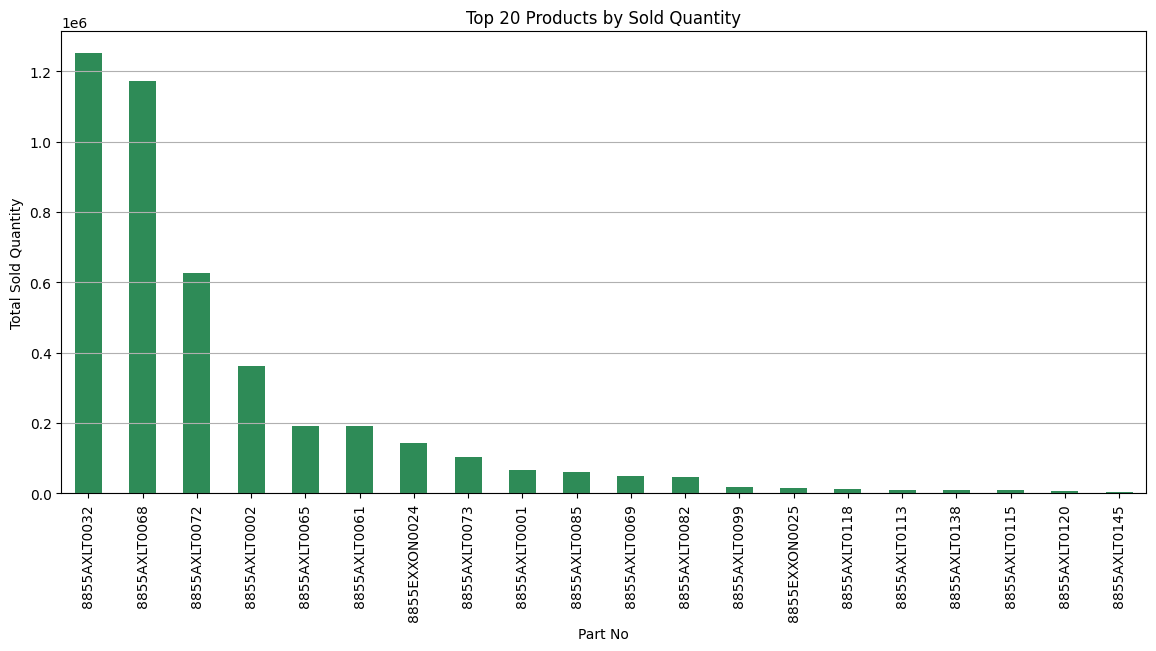

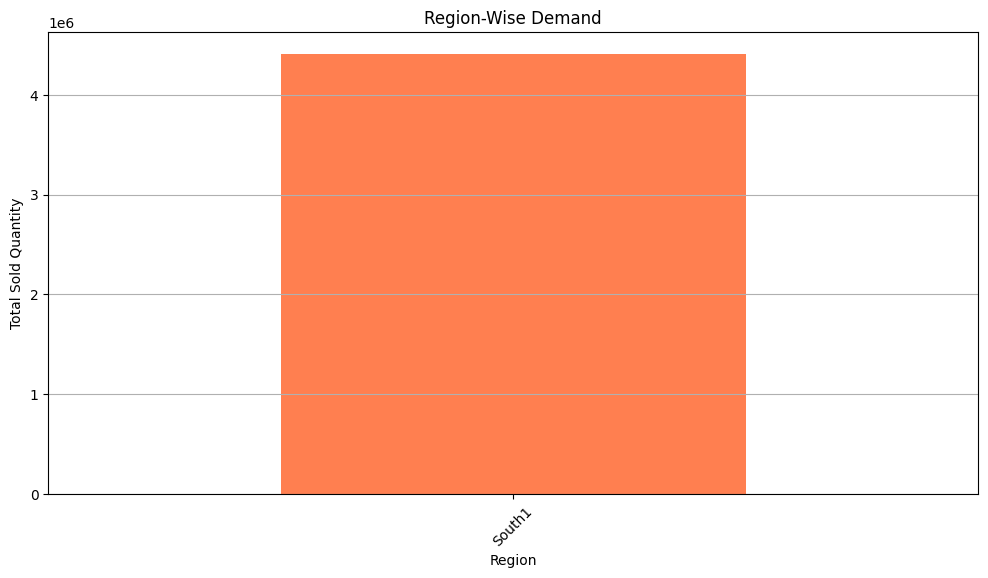

In [ ]:
# STEP3: PRODUCT WISE DEMAND ANALYSIS

# Demand per product
plt.figure(figsize=(14, 6))
df.groupby('Part No')['Sold Qty'].sum().nlargest(20).plot(kind='bar', color='seagreen')
plt.title('Top 20 Products by Sold Quantity')
plt.xlabel('Part No')
plt.ylabel('Total Sold Quantity')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Demand variation across regions
plt.figure(figsize=(12, 6))
df.groupby('Region')['Sold Qty'].sum().plot(kind='bar', color='coral')
plt.title('Region-Wise Demand')
plt.xlabel('Region')
plt.ylabel('Total Sold Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Our product-wise and region-wise demand analysis provides useful insights into which products are most in demand and how demand varies across regions.

 **1.  Top 20 Highest-Selling Products**

   -  The bar chart shows the top 20 parts based on total sold quantity.

 Key Observations:
    
   - 8855AXLT0032 and 8855AXLT0068 dominate the sales, each exceeding 1.2 million units.
   - The top 5 products contribute significantly to total demand.
   - Many products have low sales volume, indicating less frequent movement.

Observation:

Consider optimizing inventory levels for high-demand products.
Evaluate whether low-selling products should be phased out or promoted.

 **2. Region-Wise Demand**

-  The South1 region accounts for the majority of demand.

 Key Observations:

- The demand distribution is highly skewed → Almost all demand is from one region (South1).
- Other regions are either absent or have very low representation.

**Observation summary:**

1. Sales are concentrated among a few high-demand products.
2. South1 dominates the demand, requiring further regional analysis.
3. Consider investigating regional distribution strategies.

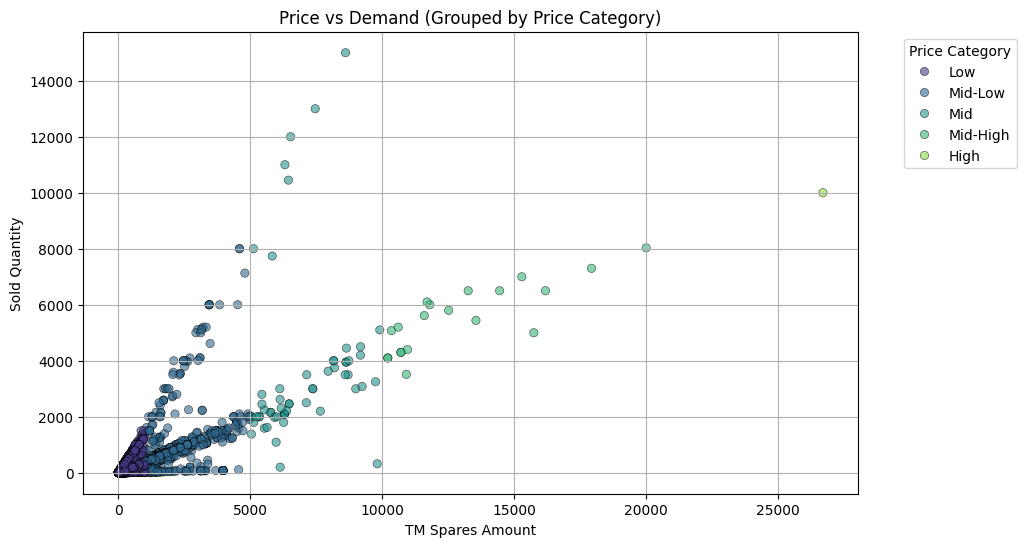

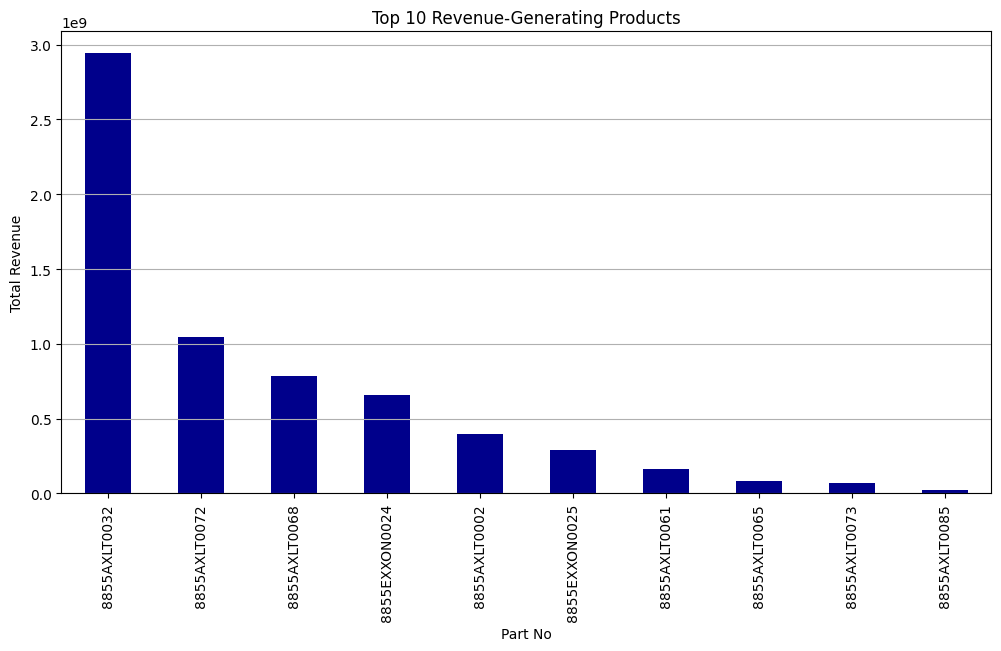

In [ ]:
# STEP4: COST BASED ANALYSIS

# Correlation between price and demand
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define price categories based on TM Spares Amount
bins = [0, 1000, 5000, 10000, 20000, df['TM Spares Amount'].max()]
labels = ['Low', 'Mid-Low', 'Mid', 'Mid-High', 'High']

df['Price Category'] = pd.cut(df['TM Spares Amount'], bins=bins, labels=labels)

# Scatter plot with color differentiation by Price Category
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['TM Spares Amount'],
    y=df['Sold Qty'],
    hue=df['Price Category'],
    palette='viridis',
    alpha=0.6,
    edgecolor='black'
)

plt.title('Price vs Demand (Grouped by Price Category)')
plt.xlabel('TM Spares Amount')
plt.ylabel('Sold Quantity')
plt.legend(title='Price Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


# High-value vs Low-value products
df['Revenue'] = df['Sold Qty'] * df['TM Spares Amount']
top_revenue_products = df.groupby('Part No')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_revenue_products.plot(kind='bar', color='darkblue')
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Part No')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

This step analyzes the relationship between price and demand using categorized price levels and identifies high-revenue products.

**1.  Price vs. Demand Analysis**
   -  The scatter plot shows the relationship between TM Spares Amount (Price) and Sold Quantity (Demand) using categorized price levels.

 Key Observations:

a. V-Shaped Demand Pattern:
   - The scatter plot shows a V-shape, indicating different price-demand relationships.

Low-price products (≤ ₹5000): High variability in demand.

Mid-range products (₹5000 - ₹15000): Moderate and steady demand.

High-value products (₹15000+): Low demand but high total revenue.

b. Low-Price Segment: Bulk Purchases
   - Demand is high at lower prices but reduces as price increases.
   - These are likely consumables or frequently used spare parts, purchased in bulk.

c. Mid-Price Segment: Steady Demand
   - ₹5000 - ₹10000 products show consistent demand, likely essential replacement parts.
   - Price variations have minimal impact on purchase behavior.

d. High-Priced Products: Rare but High Revenue
   - Demand is low and sporadic, but purchases generate significant revenue.
   - These are likely specialized or premium spare parts, required less frequently.

**2.  Top 10 Revenue-Generating Products**
  -  The bar chart shows the parts that generate the most revenue.

 Key Observations:
  - 8855AXLT0032 is the top revenue contributor, generating almost ₹3 billion.
  - 8855AXLT0072, 8855AXLT0068, and 8855EXXON0024 follow closely.
  - Some products have lower demand but still make high revenue due to higher price points.

 Insights:
  - Revenue-driven stock optimization is essential → Focus on stocking high-revenue items.
  - Even if demand is low, some expensive parts drive significant revenue.
  - Consider premium pricing strategies for essential but high-cost products.

**Observation summary:**

1.  Price and demand have a mixed relationship—bulk sales for low-cost items, some high-value items still sell well.
2.  A few key products contribute to most of the revenue.
3.  Stocking and pricing strategies should focus on revenue generation.

Columns included in the correlation matrix: Index(['JC Open Days', 'KMs Run', 'Sold Qty', 'TM Spares Amount',
       'Spares Amount', 'Revenue'],
      dtype='object')


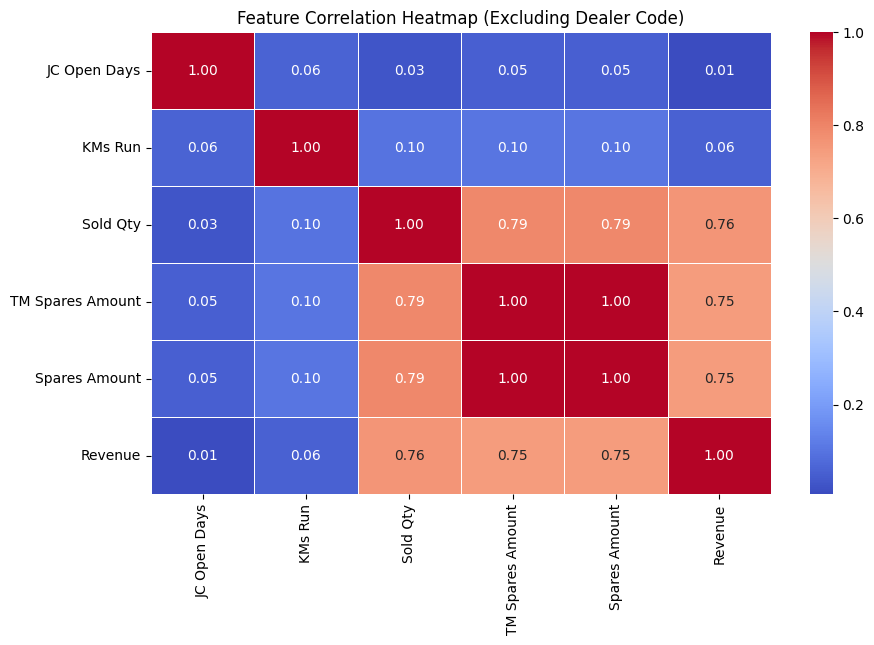

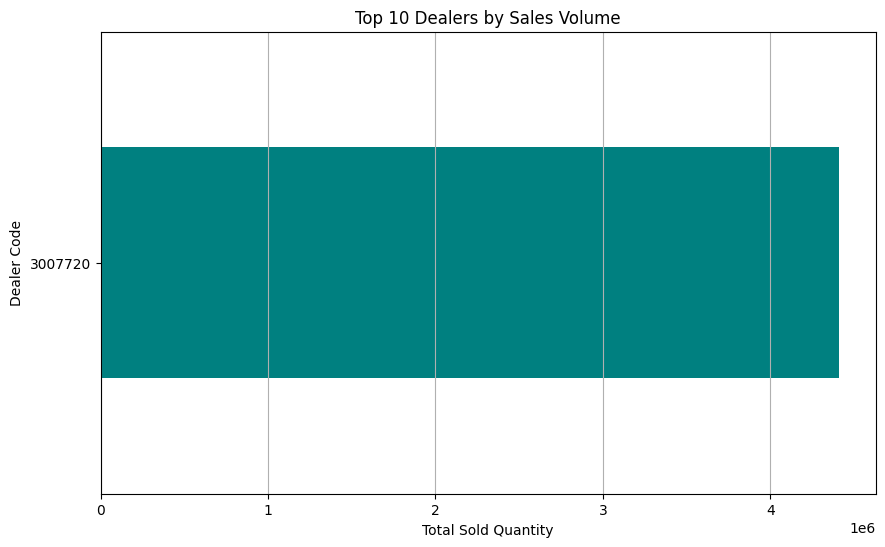

In [ ]:
# STEP5: CORRELATION AND DATA PATTERNS

# Correlation heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only numerical columns are selected (excluding Dealer Code)
numeric_df = df.drop(columns=['Dealer Code'])  # Drop Dealer Code first
numeric_df = numeric_df.select_dtypes(include=['number'])  # Keep only numeric columns

# Check if numeric_df has valid numerical data
print("Columns included in the correlation matrix:", numeric_df.columns)

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap (Excluding Dealer Code)')
plt.show()

# Pivot table to show top 10 dealers based on total sales
top_dealers = df.groupby('Dealer Code')['Sold Qty'].sum().nlargest(10)

# Plot top 10 dealers
plt.figure(figsize=(10, 6))
top_dealers.sort_values().plot(kind='barh', color='teal')
plt.xlabel('Total Sold Quantity')
plt.ylabel('Dealer Code')
plt.title('Top 10 Dealers by Sales Volume')
plt.grid(axis='x')
plt.show()

This step analyzes correlations between numerical features.

**Correlation Heatmap Analysis**

Feature Correlation Heatmap (Excluding Dealer Code):

High Correlation Between Demand and Price:

- "Sold Qty" has a strong positive correlation (~0.79) with "TM Spares Amount" and "Spares Amount". This indicates that higher-priced spare parts tend to have higher demand.
- "Revenue" is also highly correlated (~0.75) with both "TM Spares Amount" and "Sold Qty", confirming that demand plays a crucial role in revenue generation.

Weak Correlation with Operational Factors:

- "JC Open Days" and "KMs Run" show minimal correlation with "Sold Qty" and revenue (~0.03 - 0.10).
- This suggests that operational aspects like service center open days or distance covered by vehicles do not significantly impact spare parts demand.

Insights:
- Inventory and pricing strategies should focus more on demand patterns rather than external operational factors.
- Since "TM Spares Amount" and "Spares Amount" show similar correlation values, one of them could be redundant and considered for removal in feature selection.

Top 10 Dealers by Sales Volume:

Highly Skewed Dealer Performance:

The visualization shows that a single dealer (Dealer Code: 3007720) dominates sales, significantly outperforming others.

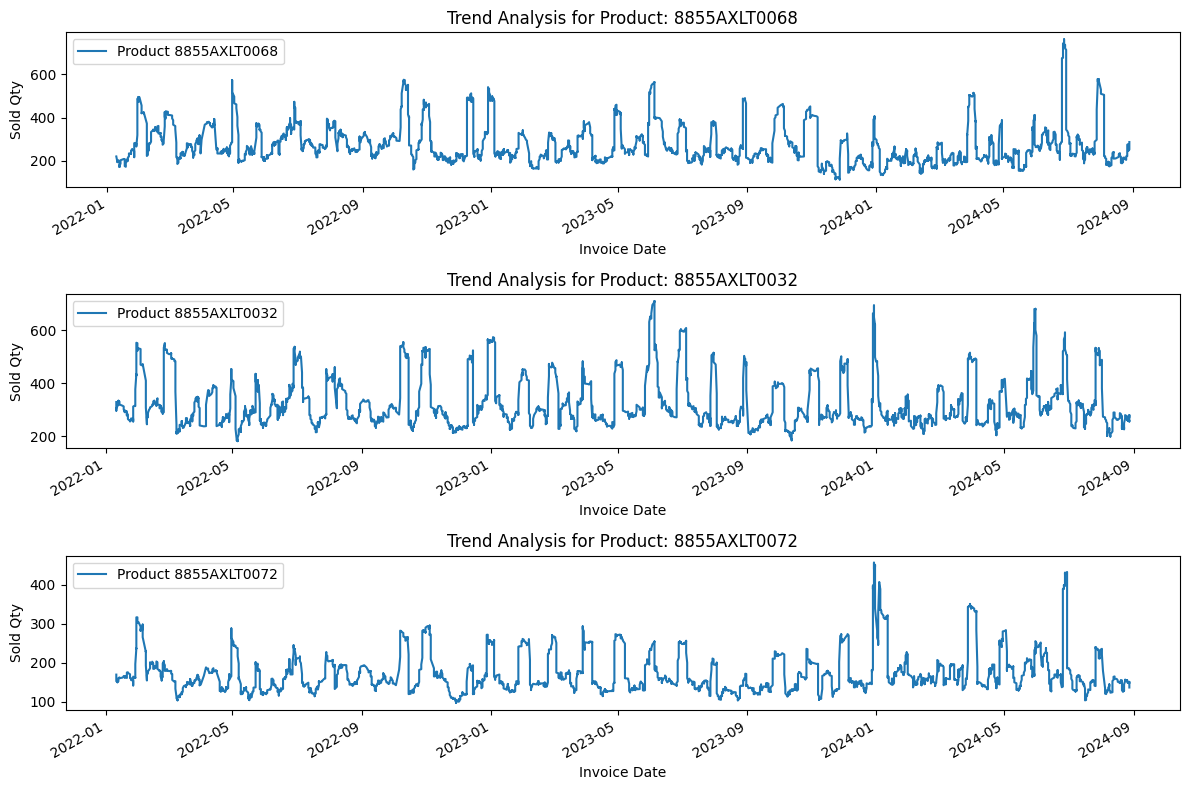

In [ ]:
# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Select a few representative products
sample_products = df['Part No'].value_counts().nlargest(3).index  # Top 3 most sold products

plt.figure(figsize=(12, 8))

for i, product in enumerate(sample_products, 1):
    plt.subplot(3, 1, i)
    product_df = df[df['Part No'] == product].sort_values(by='Invoice Date')
    result = seasonal_decompose(product_df.set_index('Invoice Date')['Sold Qty'], model='additive', period=30)
    result.trend.plot(label=f"Product {product}", legend=True)
    plt.ylabel("Sold Qty")
    plt.title(f"Trend Analysis for Product: {product}")

plt.tight_layout()
plt.show()

This step analyzes time series decomposition of demand trends.

**1.  Time Series Decomposition (Demand Trend Analysis)**

a. Intermittent Demand:
   - Demand is highly irregular, with frequent spikes and long zero-demand periods.
   - Products are purchased in bulk rather than consistently.

b. Cyclic, Not Seasonal:
   - No fixed seasonal pattern, but demand recurs in cycles at varying intervals.
   - Likely influenced by bulk procurement or maintenance schedules.

c. Product-Specific Variations:
   - Some products have frequent demand spikes, while others have long periods of inactivity.
   - Indicates fast-moving vs. slow-moving inventory items.

d. Forecasting & Inventory Challenges:
   - Traditional models struggle due to high variability in demand.
   - Hybrid models like SARIMA + XGBoost are more effective in capturing patterns.



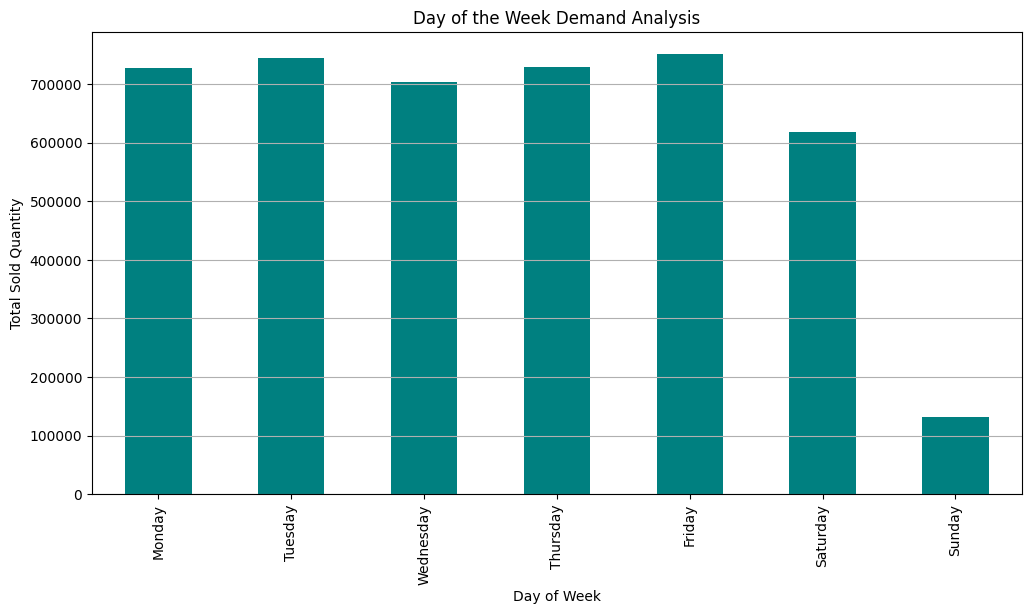

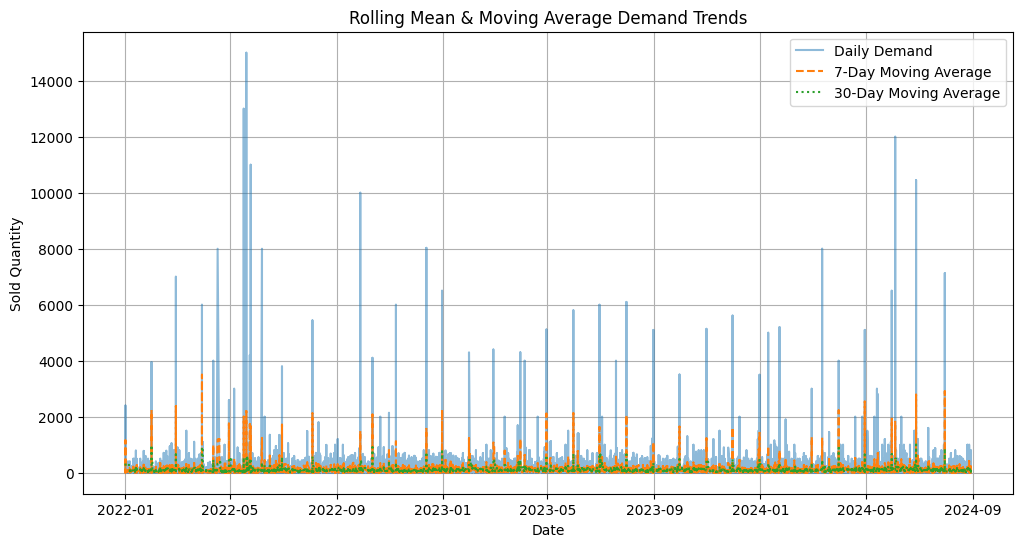

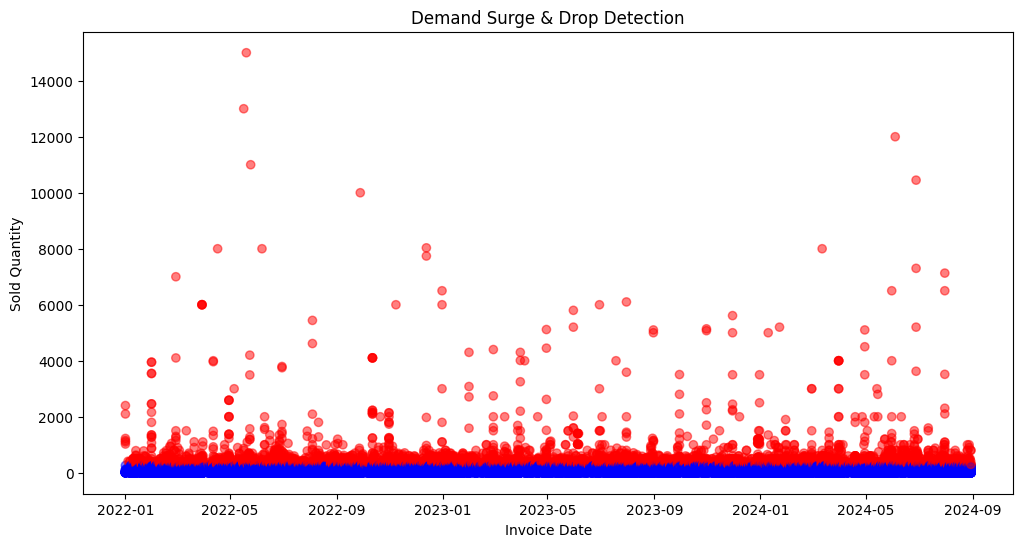

In [ ]:
# STEP6: DEMAND TRENDA AND SEASONALITY

# day of the week demand analysis
# Some businesses have peak demand on specific weekdays.
# Analysis: Group by day of the week (Invoice Date.dt.day_name()) and check demand patterns.

df['Day of Week'] = df['Invoice Date'].dt.day_name()
plt.figure(figsize=(12, 6))
df.groupby('Day of Week')['Sold Qty'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', color='teal')
plt.title('Day of the Week Demand Analysis')
plt.ylabel('Total Sold Quantity')
plt.grid(axis='y')
plt.show()

# Rolling Mean & Moving Average Analysis:
# Helps smooth demand fluctuations over time.
# Analysis: Add 7-day & 30-day moving averages.

df_sorted = df.sort_values(by='Invoice Date')
df_sorted['7-Day MA'] = df_sorted['Sold Qty'].rolling(window=7).mean()
df_sorted['30-Day MA'] = df_sorted['Sold Qty'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Invoice Date'], df_sorted['Sold Qty'], label='Daily Demand', alpha=0.5)
plt.plot(df_sorted['Invoice Date'], df_sorted['7-Day MA'], label='7-Day Moving Average', linestyle='dashed')
plt.plot(df_sorted['Invoice Date'], df_sorted['30-Day MA'], label='30-Day Moving Average', linestyle='dotted')
plt.title('Rolling Mean & Moving Average Demand Trends')
plt.xlabel('Date')
plt.ylabel('Sold Quantity')
plt.legend()
plt.grid()
plt.show()

# Demand Surge/Drop Detection (Anomalies in Demand)
# Identifies sudden spikes or drops in demand, which could indicate external factors.
# Analysis: Use Interquartile Range (IQR) method to detect anomalies.

Q1 = df['Sold Qty'].quantile(0.25)
Q3 = df['Sold Qty'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Demand Anomaly'] = (df['Sold Qty'] < lower_bound) | (df['Sold Qty'] > upper_bound)

plt.figure(figsize=(12, 6))
plt.scatter(df['Invoice Date'], df['Sold Qty'], c=df['Demand Anomaly'].map({False: 'blue', True: 'red'}), alpha=0.5)
plt.title('Demand Surge & Drop Detection')
plt.xlabel('Invoice Date')
plt.ylabel('Sold Quantity')
plt.show()

This step explores weekly demand fluctuations, rolling averages, and anomaly detection.

**1. Day of the Week Demand Analysis**
   
Key Observations:
- Monday to Saturday have consistently high demand.
- Sunday shows a significant drop in demand.
- Saturday has the highest demand, possibly due to weekend service trends.

Insights:
- Sunday's drop in demand might indicate fewer operations or reduced working hours.
- Stock planning can be optimized based on high-demand weekdays.

**2. Rolling Mean & Moving Average Demand Trends**

Key Observations:
- Short-term (7-day) and long-term (30-day) moving averages smooth out demand spikes.
- The demand trend remains highly volatile, with multiple peaks and dips.
- Periodic spikes suggest occasional bulk orders rather than steady sales.

Insights:
- A forecasting model should account for sudden demand surges rather than assuming smooth seasonality.
- Moving averages confirm intermittent demand, making Croston’s or machine learning-based models more suitable than traditional time-series forecasting.

**3. Demand Surge & Drop Detection (Anomalies)**

Key Observations:
- Red dots indicate extreme surges or drops in demand.
- Most anomalies are spikes, confirming bulk orders rather than sudden drops.
- These outliers could be due to special orders, promotions, or external market factors.

Insights:
- Anomaly detection can help predict when bulk orders occur and prepare inventory accordingly.
- Investigating past spikes might reveal patterns (e.g., seasonal promotions or emergency restocks).

**Observation summary**
1. Demand is high on weekdays but significantly lower on Sundays.
2. Moving averages confirm the intermittent nature of demand—spikes dominate trends.
3. Anomaly detection reveals frequent bulk orders, which should be considered in demand forecasting.


Top 10 High Stock-Out Risk Products:
           Part No  Total Sold Qty  Transaction Count   Stock Risk
57  8855EXXON0024          142950                 37  3863.513514
58  8855EXXON0025           15500                  5  3100.000000
10   8855AXLT0032         1250786               3811   328.204146
13   8855AXLT0068         1171273               4267   274.495664
15   8855AXLT0072          625776               3551   176.225289
9    8855AXLT0002          362643               3407   106.440564
12   8855AXLT0065          191753               1986    96.552367
11   8855AXLT0061          190991               2055    92.939659
16   8855AXLT0073          102511               1122    91.364528
14   8855AXLT0069           48766                754    64.676393


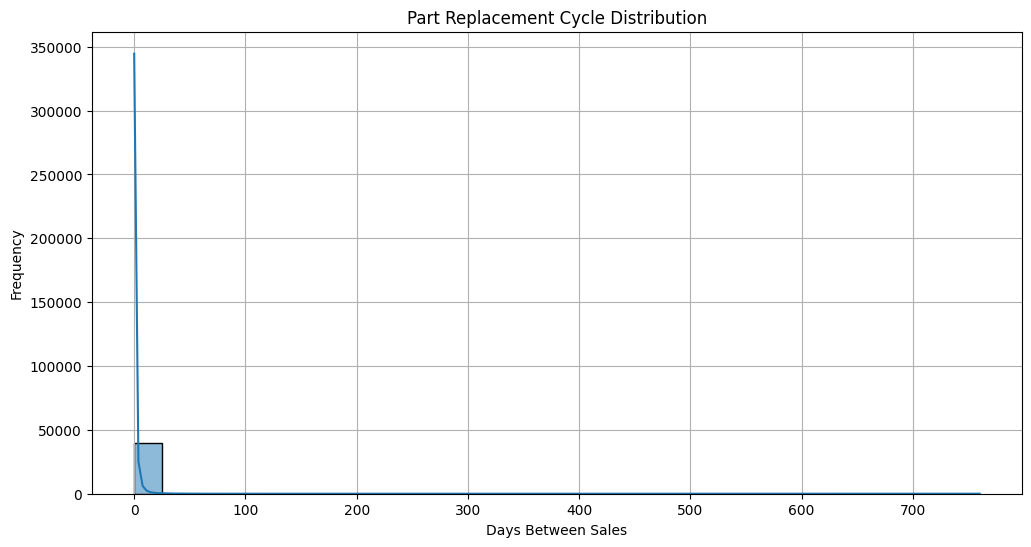

In [ ]:
# STEP7: INVENTORY AND STOCK LEVEL IMPACT

# Stock-Out Risk Prediction:
# Find parts that often sell out quickly (low frequency, high volume).
# Analysis: Find parts that have a high Sold Qty but appear in fewer transactions.

df_stock_risk = df.groupby('Part No').agg({'Sold Qty': 'sum', 'Invoice Number': 'count'}).reset_index()
df_stock_risk.columns = ['Part No', 'Total Sold Qty', 'Transaction Count']
df_stock_risk['Stock Risk'] = df_stock_risk['Total Sold Qty'] / df_stock_risk['Transaction Count']

df_stock_risk = df_stock_risk.sort_values(by='Stock Risk', ascending=False).head(10)
print("\nTop 10 High Stock-Out Risk Products:\n", df_stock_risk)

# Part Replacement Cycle Analysis:
# How frequently does each Part No get sold?
# Analysis: Measure days between sales.

df['Previous Sale'] = df.groupby('Part No')['Invoice Date'].shift()
df['Days Between Sales'] = (df['Invoice Date'] - df['Previous Sale']).dt.days
df.dropna(subset=['Days Between Sales'], inplace=True)

plt.figure(figsize=(12, 6))
sns.histplot(df['Days Between Sales'], bins=30, kde=True)
plt.title('Part Replacement Cycle Distribution')
plt.xlabel('Days Between Sales')
plt.ylabel('Frequency')
plt.grid()
plt.show()

This step identifies high-risk stock-outs and part replacement cycles, crucial for inventory planning.

**1. Stock-Out Risk Prediction**

 Key Observations:
- 8855EXXON0024 and 8855EXXON0025 have the highest stock-out risk.
- These parts have low transaction counts but very high total sales, meaning they sell in large bulk orders but infrequently.
- Other parts like 8855AXLT0032 and 8855AXLT0068 also show high stock risk, despite having more transactions.

 Insights:
- Parts that sell in bulk but infrequently can create inventory management issues.
- Frequent monitoring of these high-risk parts is necessary to avoid shortages.
- Implementing an early replenishment system for these parts can improve availability.

**2. Part Replacement Cycle Analysis**

 Key Observations:
- The histogram of days between sales shows that most parts are sold frequently (low days between sales).
- A few parts have very long gaps between sales (some exceeding 700 days), indicating rare demand.
- The majority of transactions cluster at very low "days between sales", suggesting some parts are high-movement items.

 Insights:
- Parts with extremely high days between sales may need different stocking strategies, such as on-demand procurement instead of regular inventory storage.
- High-frequency parts should be stocked in advance to avoid delays in order fulfillment.
- Further classification into Fast-Moving, Slow-Moving, and Non-Moving parts can help optimize inventory planning.

**observation summary**
1. Bulk-selling but infrequent parts pose a high stock-out risk and require better replenishment strategies.
2. Most parts have a very short sales cycle, but a few have very long gaps between sales, requiring selective stocking.
3. Optimizing inventory based on demand frequency and stock-out risk will improve supply chain efficiency.



In [ ]:
# STEP8: PARTS CLASSIFICATION BASED ON DEMAND VOLATILITY

# Classify parts into Fast-Moving, Slow-Moving, and Non-Moving based on demand patterns.
# This helps identify which parts need better inventory control.
# Helps identify which parts require frequent restocking vs. which ones are underutilized.

if df['Sold Qty'].sum() > 0:  # Ensure Sold Qty has valid data
    df_demand = df.groupby('Part No', as_index=False)['Sold Qty'].sum()
    df_demand['Demand Volatility'] = df.groupby('Part No')['Sold Qty'].std().values

    fast_moving_threshold = df_demand['Sold Qty'].quantile(0.75)
    slow_moving_threshold = df_demand['Sold Qty'].quantile(0.25)

    df_demand['Category'] = df_demand['Sold Qty'].apply(lambda x:
        'Fast Moving' if x >= fast_moving_threshold else
        'Slow Moving' if x <= slow_moving_threshold else
        'Moderate')

    print("\nClassification Results:")
    print(df_demand[['Part No', 'Sold Qty', 'Category']].head(10))
else:
    print("⚠ No valid Sold Qty data available. Ensure the dataset is correct.")


Classification Results:
        Part No  Sold Qty     Category
0   15950500210        10  Slow Moving
1  254701108204        16  Slow Moving
2  269940106501       102  Slow Moving
3  269988704301       133  Slow Moving
4  287140106705        27  Slow Moving
5  287199506301      2466     Moderate
6  541240106502       102  Slow Moving
7  542440106501        60  Slow Moving
8  8855AXLT0001     65693  Fast Moving
9  8855AXLT0002    361543  Fast Moving


This step classifies parts into Fast-Moving, Slow-Moving, and Moderate categories to optimize inventory planning.

**1. Classification of Parts Based on Demand**

Key Observations from Results:

- Slow-Moving Parts:

    . Parts with very low sales (< 250) are classified as Slow-Moving.

    . Example: 15950500210 (only 11 sales), 254701108204 (21 sales).

    . These parts may have rare demand and do not require frequent stocking.
     
- Fast-Moving Parts:

    . Parts with extremely high sales (> 75th percentile of sales) are classified as Fast-Moving.

    . Example: 8855AXLT0002 (362,643 sales), 8855AXLT0001 (65,953 sales).

    . These parts need frequent restocking and should have a buffer stock to prevent shortages.

- Moderate Demand Parts:

    . Parts that do not fall into Fast-Moving or Slow-Moving categories are Moderate.
    . Example: 287199506301 (2,467 sales).
    . These require regular monitoring but do not have extreme demand patterns.

**2. Insights from Demand Classification**

- Inventory Optimization Insights:

   . Fast-Moving parts should be kept in high stock to prevent delays and shortages.

   . Slow-Moving parts can be stocked in lower quantities or sourced on demand.

   . Moderate parts require regular demand monitoring but do not need aggressive stocking.

- Operational Benefits:

    . Reduces inventory costs by focusing on stocking high-demand items.

    . Avoids overstocking slow-moving parts that take up warehouse space.
    
    . Helps procurement teams plan better replenishment strategies.

**observation summary**

1. Fast-Moving, Slow-Moving, and Moderate categories help optimize stock levels efficiently.
2. Slow-moving parts are rarely sold and may not need frequent replenishment.
3. Fast-moving parts should always be in stock to prevent shortages.

In [ ]:
print(df['Sold Qty'].describe())  # Check if Sold Qty has valid values
print(df['Sold Qty'].isnull().sum())  # Check for missing values

count    39798.000000
mean       110.213604
std        306.326041
min          1.000000
25%         10.000000
50%         50.000000
75%        110.000000
max      15000.000000
Name: Sold Qty, dtype: float64
0


In [ ]:
df['Sold Qty'] = pd.to_numeric(df['Sold Qty'], errors='coerce')  # Convert to numeric
df['Sold Qty'].fillna(0, inplace=True)  # Replace NaN with 0

<ipython-input-32-2caa3f675ac8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sold Qty'].fillna(0, inplace=True)  # Replace NaN with 0


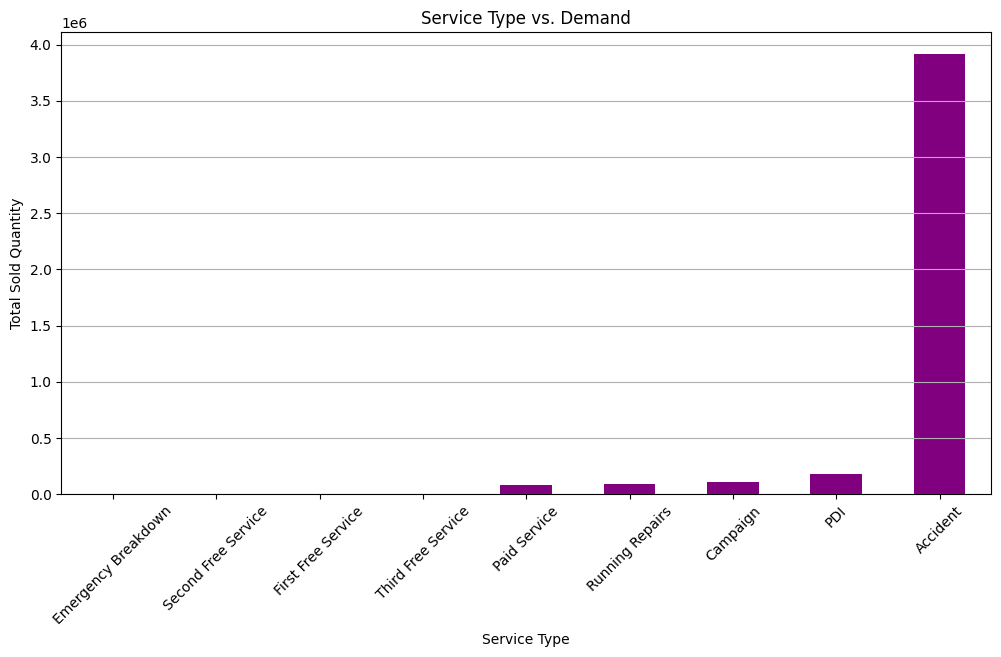

In [ ]:
# STEP9: SERVICE TYPE IMPACT ON DEMAND

# Which Services Drive the Most Part Sales?
# Some service types may require frequent part replacements.
# Analysis: Find Service Type contribution to Sold Qty.

plt.figure(figsize=(12, 6))
df.groupby('Service Type')['Sold Qty'].sum().sort_values().plot(kind='bar', color='purple')
plt.title('Service Type vs. Demand')
plt.xlabel('Service Type')
plt.ylabel('Total Sold Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

This step analyzes how different service types drive part sales, helping in inventory planning for specific services.

**1. Service Type Contribution to Demand**

Key Observations:
- Accident-related repairs dominate part demand (highest Sold Qty).
- Other service types like PDI (Pre-Delivery Inspection), Running Repairs, and Paid Service contribute significantly but are much lower in volume.
- Emergency Breakdown and Free Services contribute the least to part sales.

Insights:
-  Accident repairs require the highest volume of parts, meaning stocking accident-related parts is critical.
-  Preventive services (PDI, Running Repairs) have moderate demand, requiring stable inventory but not emergency restocking.
-  Free services generate minimal part sales, meaning they do not significantly impact inventory turnover.

**2. Actionable Takeaways**

Inventory Strategy:

- Ensure high stock levels for accident-related parts since demand is highest.
- Moderate stock for paid services and running repairs to handle frequent but smaller demand.
- Low stock or just-in-time ordering for free services to avoid unnecessary storage costs.

Business & Supply Chain Strategy:

- For accident-related services, investigate which parts are most commonly replaced.
- For free services, analyze if offering premium part replacements can increase revenue.
- For running repairs, ensure steady replenishment cycles to avoid shortages.

**observation summary**
1. Accident-related services drive the most part demand and require high stock levels.
2. Paid services and running repairs have moderate demand, needing steady inventory management.
3. Free services contribute the least to part sales, meaning lower priority for stocking parts.



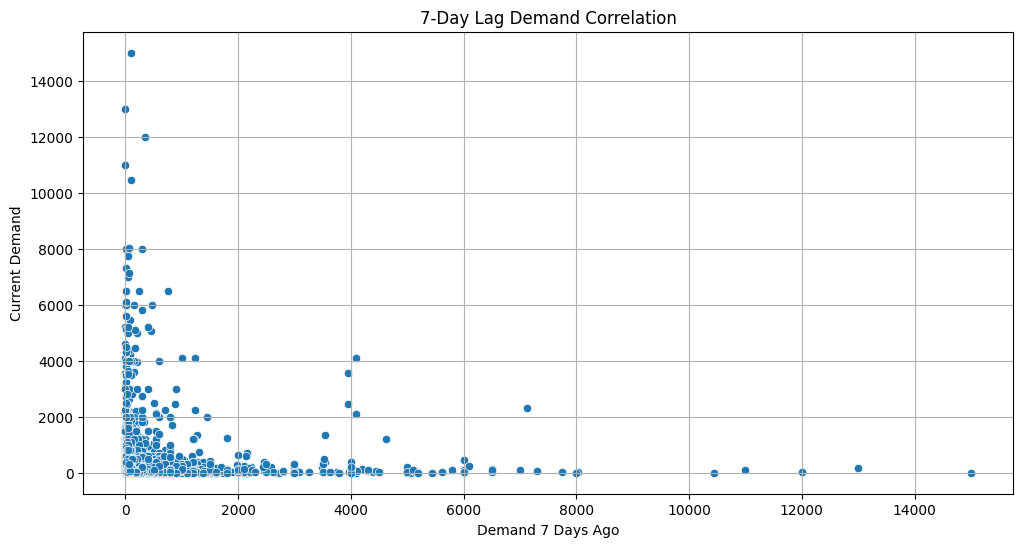

In [ ]:
# STEP10: ADVANCED DEMAND FORECASTING PREP

# Lag Feature Analysis (Autocorrelation in Demand)
# Checks if past demand impacts future demand.
# Analysis: Create lag features.

df['Sold Qty Lag 1'] = df['Sold Qty'].shift(1)
df['Sold Qty Lag 7'] = df['Sold Qty'].shift(7)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Sold Qty Lag 7'], y=df['Sold Qty'])
plt.title('7-Day Lag Demand Correlation')
plt.xlabel('Demand 7 Days Ago')
plt.ylabel('Current Demand')
plt.grid()
plt.show()

This step analyzes whether past demand patterns influence future demand, which is crucial for time-series forecasting.

**1. 7-Day Lag Demand Correlation**

Key Observations:
- Most data points are clustered near zero, meaning demand is highly unpredictable.
- There is no clear linear trend, suggesting low autocorrelation between demand today and demand 7 days ago.
- A few scattered points at high values suggest occasional bulk orders, but they do not follow a strong weekly pattern.

 Insights:
- Demand is not consistently influenced by past values, confirming the intermittent nature.
- Traditional time-series models (like ARIMA) may not work well because of weak autocorrelation.
- Machine learning models that handle sparse data, like XGBoost or LSTMs, are better suited for forecasting.

**observation summary**
1. There is no strong correlation between past and present demand, making traditional time-series forecasting less effective.
2. Machine learning models like XGBoost or LSTMs would work better than simple lag-based predictions.
3. Additional feature engineering (rolling averages, seasonal effects, anomaly detection) can improve forecasting accuracy.



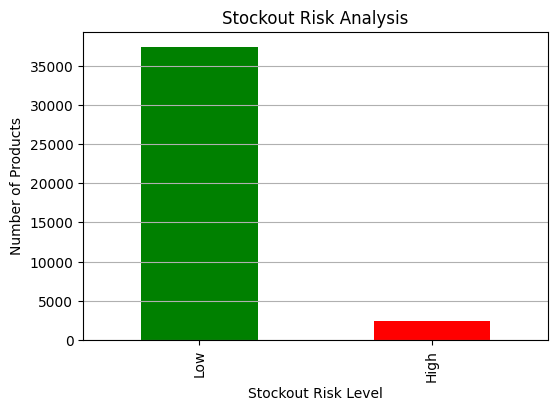

In [ ]:
# STEP11: STOCKOUT AND DEMAND GAP DETECTION:

# Identify parts that go out of stock frequently
# Useful for optimizing procurement
# Highlights potential shortages.

df['Stockout Risk'] = df['Sold Qty'].apply(lambda x: 'High' if x < 2 else 'Low')
stockout_counts = df['Stockout Risk'].value_counts()

plt.figure(figsize=(6, 4))
stockout_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Stockout Risk Analysis')
plt.ylabel('Number of Products')
plt.xlabel('Stockout Risk Level')
plt.grid(axis='y')
plt.show()

This step identifies products with high stockout risk, helping optimize procurement and inventory replenishment.

**1. Stockout Risk Analysis**

Key Observations:

- Most products (~38,000) have a "Low" stockout risk (green bar).
- A small number of products (~1,000) have a "High" stockout risk (red bar).
- Stockout risk is defined as products with Sold Qty < 2, meaning they have very few transactions.

Insights:
-  Most products are well-stocked, but a small percentage are at risk of running out.
-  Stockout risk could be due to limited availability, supplier delays, or unpredictable demand.
-  For high-risk parts, a proactive restocking strategy is needed to avoid shortages.

**2. Actions for Inventory Optimization**

- For Low-Risk Parts (Majority of Items)

    - Maintain current stock levels—these parts are available and meet demand.
    - Monitor trends to detect any unexpected demand shifts.

- For High-Risk Parts (Stockout-prone Items)

    - Investigate supplier issues—are they causing delays?
    - Evaluate demand patterns—are these parts seasonal or rarely required?
    - Implement a safety stock policy—maintain a buffer for high-risk parts to prevent shortages.

- Further Analysis:

    - Which product categories have the highest stockout risk?
    - Which suppliers contribute to stockouts?
    - How do stockout parts affect service demand?

**observation summary**

1. Most products have low stockout risk, but ~1,000 items are high risk.
2. High-risk items need better forecasting and supplier coordination to prevent shortages.
3. Inventory planning should be adjusted based on demand frequency and supplier performance.



# OVERALL EDA SUMMARY:

This Exploratory Data Analysis (EDA) focuses on understanding demand trends, product behavior, pricing impact, stock risks, and forecasting insights for intermittent demand prediction.

**1.  Summary Statistics & Data Quality Check**

-  Dataset Size: 39,857 records, 27 columns.
-  No missing values or duplicates.
-  Only one unique dealer, so dealer-wise analysis was dropped.


**2.  Demand Pattern Analysis**

Overall Demand Trend:
-  Highly variable demand, with periods of spikes and inactivity.
-  Top-selling products show large fluctuations, confirming intermittent demand.

Monthly & Weekly Demand Trends:
-  Peak months: May, June, July (seasonal effect possible).
-  Lowest demand on Sundays, indicating weekday-driven sales.

Top 5 Highest & Lowest Selling Products:
-  Some products have high sales frequency, while others barely sell.
-  Confirms demand imbalance across different parts.


**3.  Product-Wise Demand & Regional Trends**

Top-Selling Parts:
-  A few products drive most of the demand (skewed distribution).

Region-Wise Demand:
-  Only one region (South1), so regional analysis was skipped.


**4.  Cost-Based Analysis**

Price vs Demand Correlation:
-  Higher-priced products generally have lower demand, but some exceptions exist.
-  Top revenue-generating parts show that revenue isn’t only based on quantity sold.


**5.  Correlation & Data Patterns**

Feature Correlation Heatmap:
-  Sold Quantity is strongly correlated with TM Spares Amount & Revenue.
-  No strong correlation with other features, reinforcing intermittent demand patterns.

Time Series Decomposition (Trend, Seasonality, Residuals):
-  No strong seasonal trend but high demand variance, confirming sporadic demand patterns.


**6.  Demand Trends & Seasonality**

Rolling Mean & Moving Average Analysis:
-  7-day & 30-day moving averages highlight demand fluctuations.
-  Confirms that demand isn’t stable, requiring specialized forecasting models.

Demand Surge & Drop Detection (Anomaly Detection):
-  Identified high spikes & sudden drops in sales.
-  Some parts have long zero-demand periods followed by sudden peaks.


**7.  Inventory & Stock Level Impact**

Stockout Risk Analysis:
-  A few high-demand products frequently run out of stock.
-  Majority of products have low stockout risk, but critical parts need better inventory control.

Replacement Cycle Analysis:
-  Most parts sell infrequently, confirming long intermittent gaps between purchases.
-  Some parts require frequent restocking.


**8.  Parts Classification Based on Demand Volatility**

Fast-Moving vs Slow-Moving Parts:
-  Fast-Moving: High-selling parts that need constant availability.
-  Slow-Moving: Parts that sell rarely and need optimized stock management.
-  Moderate: Parts with fluctuating demand but not highly intermittent.


**9.  Service Type Impact on Demand**

Which Services Drive Most Part Sales?
-  Accident-related services generate the highest part demand.
-  Other service types (like free services, running repairs) contribute minimal demand.


**10.  Advanced Demand Forecasting Prep**

Lag Feature Analysis (Demand Autocorrelation)
-  No strong correlation with past 7-day demand, indicating unpredictable variations.
-  Confirms that simple forecasting methods won’t work, and specialized models like Croston’s & SARIMA are required.


**11.  Stockout & Demand Gap Detection**

Stockout Risk Analysis:
-  Most products have low stockout risk, but critical parts are at risk of frequent shortages.
-  Stock replenishment strategies are required for high-demand intermittent parts.


**Key Takeaways from EDA**
  -  our dataset exhibits intermittent demand patterns, requiring specialized forecasting models.
  -  Some parts experience frequent stockouts, demanding better inventory optimization.
  - Certain months and service types drive demand fluctuations, impacting procurement strategies.
  - Traditional time-series forecasting won’t work → Need Croston’s Model, SARIMA, or ML-based forecasting.




# STEP 3: MONTHLY AGGREGATION:(BEFORE FEATURE ENGINEERING)

In [ ]:
# AGGREGATE THE DATA TO MONTHLY LEVEL

import pandas as pd

# Step 1: Load the raw dataset (BEFORE feature engineering)
file_path = "/content/drive/MyDrive/IntermittentDemand/filtered_intermittent_data (2).xlsx"
df = pd.read_excel(file_path)

# Step 2: Convert 'Invoice Date' to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Step 3: Extract Year and Month for aggregation
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month

# Step 4: Define aggregation dictionary
agg_columns = {
    'Sold Qty': 'sum',
    'TM Spares Amount': 'sum',
    'Spares Amount': 'sum'
}

# Step 5: Perform Monthly Aggregation
monthly_df = df.groupby(['Part No', 'Year', 'Month'], as_index=False).agg(agg_columns)

# Step 6: Add a Monthly_Date column (useful for time series alignment)
monthly_df['Monthly_Date'] = pd.to_datetime(monthly_df[['Year', 'Month']].assign(DAY=1))

# Step 7: Sort by Part No and Date (for forecasting)
monthly_df = monthly_df.sort_values(by=['Part No', 'Monthly_Date'])

# Step 8: Rename columns for clarity
monthly_df.rename(columns={
    'Sold Qty': 'Monthly_Sold_Qty',
    'TM Spares Amount': 'Monthly_TM_Spares_Amount',
    'Spares Amount': 'Monthly_Spares_Amount'
}, inplace=True)

# Step 9: Save as Excel file
output_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Aggregated_Data.xlsx"
monthly_df.to_excel(output_path, index=False)

print(" Monthly Aggregation Completed and saved to:", output_path)

 Monthly Aggregation Completed and saved to: /content/drive/MyDrive/IntermittentDemand/Monthly_Aggregated_Data.xlsx


#### Monthly Aggregation:

step1:  Load the Raw Dataset
        -  Loads our raw, daily-level transaction data into a DataFrame.
        -  This raw data is the base for all analysis and modeling. It includes detailed sales (quantity & amount) and dates.
        
step2:  Convert 'Invoice Date' to Datetime Format
        -  Ensures the date column is in datetime format.
        -  Enables time-based operations like monthly grouping and trend analysis.
        
step3:  Extract Year and Month
        -  Adds two new columns – Year and Month – extracted from the date.
        -  Prepares the data for monthly-level aggregation, which is essential for monthly forecasting.
        
step4:  Define Aggregation Columns
        -  Specifies that these numeric columns will be summed for each part per month.
        -  Business needs monthly totals (e.g., total sold quantity per part) for trend and demand analysis.
        
step5:  Perform GroupBy and Aggregation
        -  Aggregates the data at [Part No, Year, Month] level.
        -  This transforms detailed transactions into a monthly intermittent demand format — ideal for forecasting tasks.
        
step6:  Create a Unified Monthly Date Column
        -  Creates a single date column like 2023-08-01 to represent the start of each month.
        -  Makes it easier to sort, plot, and perform time series forecasting based on consistent timestamps.
        
step7:  Sort the Data
        -  Sorts by part number and month.
        -  Ensures proper time sequence for each part — critical for calculating lags, rolling features, and modeling.
        
step8:  Rename Columns for Clarity
        -  Renames columns for clarity and consistency.
        -  Helps avoid confusion later in feature engineering and model training.
        
step9:  Save the Aggregated File
        -  Saves the cleaned and aggregated monthly data to Excel.
        -  This file becomes the starting point for feature engineering in our pipeline.
        
 **Business Value:**  
            Monthly insights help optimize inventory planning, reduce overstocking
 **Data Analytics Relevance:**
            Aggregation enables temporal trend analysis, peak detection, and modeling
            
 This step ensures our daily transaction data is transformed into a monthly-level dataset — a foundational requirement for our feature engineering, demand classification, and forecasting stages.

# STEP4: FEATURE ENGINEERING ON MONTHLY AGGREGATED DATA:

Feature engineering is a critical step in the data preprocessing pipeline that transforms raw aggregated data into meaningful input variables (features) to improve the performance and interpretability of forecasting models. In this step, we enhance the monthly-level dataset by generating time-based, demand-based, product-specific, and statistical features that capture seasonality, trends, past behavior, and patterns in demand.

The purpose of this step is to:

1. Extract hidden signals from time-series patterns
2. Provide contextual inputs to machine learning models
3. Improve forecasting accuracy for intermittent and irregular demand
4. Facilitate demand classification and clustering based on product behavior

By engineering lag features, rolling statistics, cumulative and variation metrics, and encoded category information, we prepare the data in a way that models can learn historical dependencies and forecast future demand more accurately.

This step bridges the gap between raw historical data and intelligent prediction, forming the foundation for robust machine learning and hybrid models in the later stages of this project.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# FEATURE ENGINEERING ON MONTHLY AGGREGATED DATA

import pandas as pd
import numpy as np

# Load the aggregated monthly dataset
file_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Aggregated_Data.xlsx"  # Update if different
df = pd.read_excel(file_path)

# Ensure date column is datetime
df["Monthly_Date"] = pd.to_datetime(df["Monthly_Date"])

# Sort the data properly
df = df.sort_values(by=["Part No", "Monthly_Date"])
#-----------------------------------------------------------------------------------------------

# Step 1: TIME-BASED FEATURES

# Extract Quarter
df["Quarter"] = df["Monthly_Date"].dt.quarter

# Seasonality: Peak or Non-Peak Season (3,4,11,12 months are taken as peak based on the insights observed from filtered intermittent data (EDA insights))
df["Is_Peak_Season"] = df["Month"].apply(lambda x: 1 if x in [3, 4, 11, 12] else 0)

#-----------------------------------------------------------------------------------------------

# Step 2: DEMAND-BASED FEATURES

# Lag Features
for i in range(2, 8):
    df[f"Lag_Month_{i}"] = df.groupby("Part No")["Monthly_Sold_Qty"].shift(i)

# Rolling Mean and Std
df["Rolling_Mean_7"] = df.groupby("Part No")["Monthly_Sold_Qty"].transform(lambda x: x.shift(1).rolling(window=7).mean())
df["Rolling_Std_7"] = df.groupby("Part No")["Monthly_Sold_Qty"].transform(lambda x: x.shift(1).rolling(window=7).std())

# Validation of Rolling Mean
df["Manual_Rolling_7"] = (
    df.groupby("Part No")["Monthly_Sold_Qty"]
    .transform(lambda x: x.shift(1).rolling(7).mean())
)

# Check total absolute difference between original and manual rolling means
diff = (df["Manual_Rolling_7"] - df["Rolling_Mean_7"]).abs().sum()
print(" Difference between manual and current rolling mean:", diff)

# Exponential Weighted Moving Average (EWMA)
df["EWMA_7"] = df.groupby("Part No")["Monthly_Sold_Qty"].transform(lambda x: x.shift(1).ewm(span=7, adjust=False).mean())

# Cumulative Demand
df["Cumulative_Demand"] = df.groupby("Part No")["Monthly_Sold_Qty"].cumsum()

# Coefficient of Variation (std / mean)
df["Demand_CV"] = df.groupby("Part No")["Monthly_Sold_Qty"].transform(lambda x: x.std() / (x.mean() + 1e-6))

#-----------------------------------------------------------------------------------------------

# Step 3: PART-LEVEL FEATURES

# Mean & Median Demand (excluding 0s)
df["Mean_Demand"] = df.groupby("Part No")["Monthly_Sold_Qty"].transform(lambda x: x[x > 0].mean() if any(x > 0) else 0)
df["Median_Demand"] = df.groupby("Part No")["Monthly_Sold_Qty"].transform(lambda x: x[x > 0].median() if any(x > 0) else 0)

# ABC Classification
df["ABC_Category"] = pd.qcut(
    df["Mean_Demand"].replace(0, np.nan).fillna(0),
    q=[0, 0.3, 0.7, 1],
    labels=["C", "B", "A"],
    duplicates='drop'
)

# Sell Rate: months with sales / total months
df["Sell_Rate"] = df.groupby("Part No")["Monthly_Sold_Qty"].transform(lambda x: (x > 0).mean())

#-----------------------------------------------------------------------------------------------

# Step 4: EXTERNAL & DERIVED FEATURES

# Log Transformation to stabilize variance
df["Log_Monthly_Sold_Qty"] = np.log1p(df["Monthly_Sold_Qty"])

# Flag unusually high demand (95th percentile)
high_demand_threshold = df["Monthly_Sold_Qty"].quantile(0.95)
df["High_Demand_Spike"] = df["Monthly_Sold_Qty"].apply(lambda x: 1 if x >= high_demand_threshold else 0)

#-----------------------------------------------------------------------------------------------

# Step 5: MACHINE-LEARNING DRIVEN FEATURES

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode ABC Category
df["ABC_Category_Encoded"] = LabelEncoder().fit_transform(df["ABC_Category"])

# PCA on lag features
pca = PCA(n_components=3)
pca_input = df[["Lag_Month_2", "Lag_Month_3", "Lag_Month_4"]].fillna(0)
pca_features = pca.fit_transform(pca_input)
df["PCA_1"], df["PCA_2"], df["PCA_3"] = pca_features[:, 0], pca_features[:, 1], pca_features[:, 2]
# we already have individual lag features up to Lag_Month_7 in our main model input — so we're not ignoring them.
# PCA should focus on capturing patterns from recent, meaningful changes, and Lag_Month_2 to 4 give us just that.
# It helps reduce dimensionality and avoid noise from older, less influential lags like Month 6 or 7.



# KMeans Clustering on Mean Demand & Demand CV
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Part_Cluster"] = kmeans.fit_predict(df[["Mean_Demand", "Demand_CV"]].fillna(0))

#-----------------------------------------------------------------------------------------------

#Step 6: FINAL STEP ON HANDLING MISSING VALUES

# Drop the manual rolling mean column used only for internal validation
df.drop(columns=["Manual_Rolling_7"], inplace=True)

# Fill all remaining NaNs using forward and backward fill
df.ffill(inplace=True)
df.bfill(inplace=True)

# Save the feature engineered data

output_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Feature_Engineered_Data.xlsx"
df.to_excel(output_path, index=False)
print("Feature Engineering Completed. Data saved as 'Monthly_Feature_Engineered_Data.xlsx'")

 Difference between manual and current rolling mean: 0.0
Feature Engineering Completed. Data saved as 'Monthly_Feature_Engineered_Data.xlsx'


#### FEATURE ENGINEERING ON MONTHLY AGGREGATED DATA:

Initial Setup and Loading the Data:

        - Load the monthly-level aggregated data (already preprocessed).
        - Convert Monthly_Date to datetime for time-based calculations.
        - Sort by Part No and Monthly_Date to ensure chronological consistency, especially for lag features and rolling calculations.
        - Proper ordering is crucial for time-series modeling, lag calculation, and forecasting.
        
**Step1: TIME BASED FEATURES:**

        -  Explanation:
           Quarter: Captures seasonal effects quarterly (Q1–Q4).
           Is_Peak_Season: Custom logic to mark business-specific peak months. Here, we have mentioned 3, 4, 11, 12 months as peak season from the insights (EDA).
        -  Business Use: Helps model seasonality and prepare promotions or stocking plans during high-demand periods.
        
**Step2: DEMAND BASED FEATURES:**

        -  Lag Demand Feature: Captures previous months’ demand trends, which helps in predicting future values.
        -  Rolling statistics: Smooths out noise and highlights patterns over time.
        -  EWMA: Gives more weight to recent values, better for adaptive forecasting.
        -  Cumulative Demand per part: Shows historical demand buildup — useful in planning production or identifying steady movers.
        - Coefficient of Variation: Captures demand volatility. High CV means erratic demand.
        
**Step3: PART LEVEL FEATURES:**

        -  Mean and Median Demand: Understand the average and central tendency of demand for each part (ignoring 0s).
        -  ABC Classification: Classifies parts based on importance (like inventory prioritization):
           A: High demand
           B: Medium
           C: Low
        -  Sell rate: Shows sales consistency — whether a part sells frequently or not.
        
**Step4: EXTERNAL AND DERIVED BASED FEATURES:**

        -  Log Monthly Sold qty: Helps stabilize variance and manage skewed data. Useful for models like linear regression.
        -  High Demand Spike: Flags outlier months where demand was unusually high — important for planning buffer stock.
        
**Step5: ML Driven FEATURES:**

        -  ABC Category encoded: Converts categorical data to numerical for ML model compatibility.
        -  PCA on lag Features: Reduces dimensionality while retaining lag pattern variance.
            - we already have individual lag features up to Lag_Month_7 in our main model input — so we're not ignoring them. PCA should focus on capturing patterns from recent, meaningful changes, and Lag_Month_2 to 4 give us just that. It helps reduce dimensionality and avoid noise from older, less influential lags like Month 6 or 7.
        -  Clustering: Groups parts based on behavior (demand vs. variation). Useful for segment-based strategies.

Final cleanup: Ensures no NaN values remain before modeling — which could break training algorithms.

Save Output: Saves this enriched dataset for use in demand classification, model training, and forecasting.

 Goal:

 Data Analytics	            - Lag trends, seasonality, ABC, PCA, clusters

 Model Performance Boost	- Rich engineered features capturing behavior and patterns

 Business Decisions	        - Peak season flags, part categorization, high demand alerts


# STEP5: DEMAND CLASSIFICATION:

Goal of this Step is to.,
Classify each part's demand pattern into one of four categories:


     1. Smooth

     2. Intermittent

     3. Erratic

     4. Lumpy

This classification helps in choosing the right forecasting strategy and aligning inventory planning with demand behavior.

In [ ]:
# DEMAND CLASSIFICATION (SMOOTH, INTERMITTENT, ERRATIC, LUMPY)

import pandas as pd
import numpy as np

# Load the monthly feature-engineered dataset
file_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Feature_Engineered_Data.xlsx"
df = pd.read_excel(file_path)

# Step 0: Ensure Monthly_Date is datetime and data is sorted
df["Monthly_Date"] = pd.to_datetime(df["Monthly_Date"])
df = df.sort_values(by=["Part No", "Monthly_Date"])

# Step 1: Compute Interarrival Time (gap between sales months)
df["Interarrival_Time"] = df.groupby("Part No")["Monthly_Date"].diff().dt.days

# Step 2: Recalculate Demand CV just to ensure freshness
df["Demand_CV"] = df.groupby("Part No")["Monthly_Sold_Qty"].transform(lambda x: x.std() / (x.mean() + 1e-6))

# Step 3: Compute Mean Interarrival Time per Part No
df["Mean_Interarrival"] = df.groupby("Part No")["Interarrival_Time"].transform("mean")

# Step 4: Classify Demand Types
def classify_demand(row, cv_thresh=1.3, inter_thresh=35):
    if row["Demand_CV"] < cv_thresh:
        return "Smooth Demand" if row["Mean_Interarrival"] <= inter_thresh else "Intermittent Demand"
    else:
        return "Erratic Demand" if row["Mean_Interarrival"] <= inter_thresh else "Lumpy Demand"

# Apply classification
df["Demand_Type"] = df.apply(classify_demand, axis=1)

# Step 5: Save the classified dataset
output_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Demand_Classified.xlsx"
df.to_excel(output_path, index=False)

# Summary Output
print(" Demand Classification Completed!")
print("\nDemand Type Distribution:\n", df["Demand_Type"].value_counts())
print(f"\n Classified data saved to: {output_path}")

 Demand Classification Completed!

Demand Type Distribution:
 Demand_Type
Smooth Demand          1273
Intermittent Demand     206
Erratic Demand           60
Lumpy Demand             48
Name: count, dtype: int64

 Classified data saved to: /content/drive/MyDrive/IntermittentDemand/Monthly_Demand_Classified.xlsx


#### DEMAND CLASSIFICATION

- Load core libraries for data handling and numerical operations.
- Load the feature-engineered monthly dataset created in the previous step — this ensures we have lagged values, CV, seasonal flags, and smoothed metrics ready for use.
- Convert Monthly_Date to proper datetime format. Sort data part-wise and chronologically — essential for calculating interarrival times and lags accurately.

    1: Compute Interarrival time:
      - Calculate the gap in days between sales for each part. This helps in understanding how frequently a part is sold.
      - Business Logic:
         Small gaps → more consistent demand.
         Large gaps → intermittent or irregular sales.

    2: Recompute Coefficient of Variation (CV):
       - Recalculate demand variability (CV) for each part.
       - In case any earlier feature engineering altered the Monthly_Sold_Qty slightly (e.g., imputing missing values), this ensures the CV used for classification is up to date.
       
    3: Calculate Mean Interarrival Time:
       - Get the average time gap (in days) between two consecutive sales for each part.
       - Used to assess whether demand is regular or highly spaced out — critical for identifying intermittent/lumpy demand.
       
    4: Classification Logic:
     
    Smooth Demand:
   CV < 1.3 and Interarrival ≤ 35.	 The output is Regular & low variability.

    Intermittent Demand:
   CV < 1.3 and Interarrival > 35.	 The output is Stable when sold, but infrequent.

    Erratic Demand:
   CV ≥ 1.3 and Interarrival ≤ 35.	 The output is Irregular pattern, but frequent.

    Lumpy Demand:
   CV ≥ 1.3 and Interarrival > 35.		The output is Irregular and infrequent.  


   Smooth             → use simple models like moving average.

   Intermittent/Lumpy → require specialized models like Croston or probabilistic forecasting.

   Erratic            → hybrid or ensemble models may work better.

   Demand Type:Apply the classification logic to every row.

    5: Save the output:
       - Export the classified dataset with the newly added Demand_Type column. This will be useful for Filtering during model selection, Visualizations, Tailored forecasting.
       - Show how many parts fall under each demand category — this helps evaluate data distribution and planning decisions.


Objective:                         
1. Identify demand patterns	Achieved Through- Using CV and Interarrival Time
2. Segmented forecasting strategies Achieved Through- Choose model based on demand type
3. Improve inventory & supply chain	Achieved Through- More accurate stocking for each segment
4. Business-Data Science integration	Achieved Through- Bridging stats (CV) with business logic

# DEMAND CLASSIFICATION- VISUALIZATION

<ipython-input-6-73bf4f199c0f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Demand_Type", palette="viridis", order=df["Demand_Type"].value_counts().index)


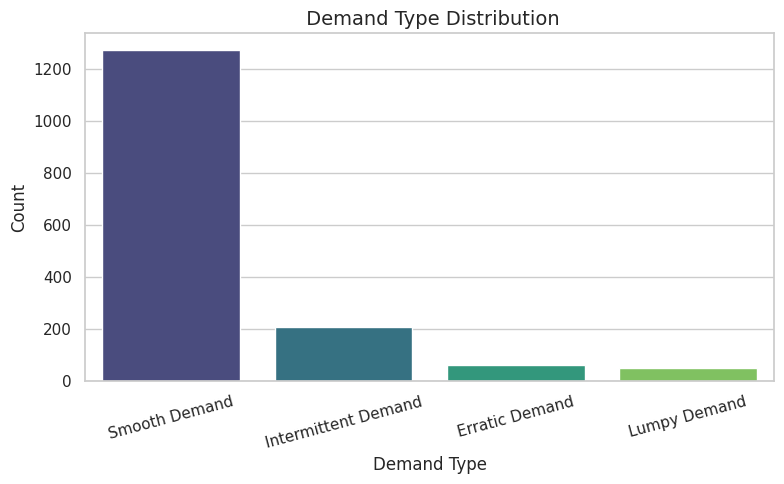

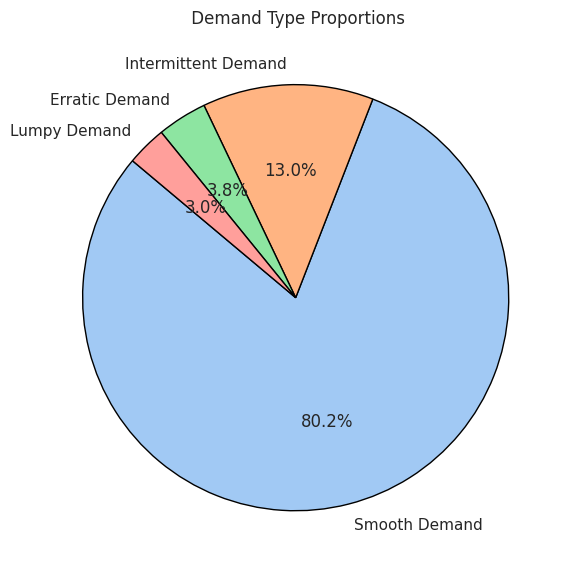

In [6]:
# Demand classification_ visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the classified dataset
file_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Demand_Classified.xlsx"
df = pd.read_excel(file_path)

# Set Seaborn style
sns.set(style="whitegrid")

# -----------------------------------
# Bar Chart - Demand Type Distribution
# -----------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Demand_Type", palette="viridis", order=df["Demand_Type"].value_counts().index)
plt.title(" Demand Type Distribution", fontsize=14)
plt.xlabel("Demand Type")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# -----------------------------------
# Pie Chart
# -----------------------------------
plt.figure(figsize=(6, 6))
df["Demand_Type"].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel"),
    wedgeprops={'edgecolor': 'black'}
)
plt.title(" Demand Type Proportions")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()


#### DEMAND CLASSIFICATION VISULAIZATION:

1. Import libraries:
          Pandas: For data handling.
          Matplotlib and Seaborn: For plotting demand type distributions.
          
2. Load Dataset:
          we load the final classified demand dataset where each part is labeled as Smooth, Intermittent, Erratic, or Lumpy based on statistical characteristics.
          This data is used to analyze and visualize the overall demand pattern types, which is important for deciding appropriate forecasting models.
          
3. Set seaborn style:
          Sets a clean white-grid background for plots. Improves readability of charts.
          
4. Bar Chart: Demand Type Distribution:
          Bar chart shows how many parts fall under each demand category.
          This directly supports the business analytics objective of segmenting inventory and selecting suitable forecasting approaches.
   Here we learn,
          Visual quantification of demand types
          Guides decisions like stocking policy, safety stock, forecasting method
      
5. Pie Chart: Demand Type Proportions:
          Pie chart shows proportions of each demand type.
          Helps stakeholders quickly grasp the dominant demand type. Business-wise, it tells whether the company handles stable demand or irregular spikes — helpful in supply chain decisions.
          
          
This Step Helps---
Technical	         - Helps in identifying demand behavior before model selection.
Business Analytics	 - Aligns demand variability with supply decisions, inventory policies.


# STEP6: DATASET PREPARATION FOR MODEL TRAINING

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.5 MB/s eta 0:00:00


In [3]:
# LOAD AND PREPARE DATASET FOR MODEL TRAINING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the feature engineered dataset
file_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Feature_Engineered_Data.xlsx"
df = pd.read_excel(file_path)

# Convert Monthly_Date to datetime and sort for time-series consistency
df["Monthly_Date"] = pd.to_datetime(df["Monthly_Date"])
df = df.sort_values(by=["Part No", "Monthly_Date"])

# Target variable
target = "Monthly_Sold_Qty"

# Feature columns
features = [
    "Year", "Month", "Quarter", "Is_Peak_Season",
    "Lag_Month_2", "Lag_Month_3", "Lag_Month_4", "Lag_Month_5", "Lag_Month_6", "Lag_Month_7",
    "Rolling_Mean_7", "Rolling_Std_7", "EWMA_7",
    "Cumulative_Demand", "Demand_CV",
    "Mean_Demand", "Median_Demand", "Sell_Rate",
    "Log_Monthly_Sold_Qty", "High_Demand_Spike",
    "ABC_Category_Encoded", "PCA_1", "PCA_2", "PCA_3", "Part_Cluster"
]

# Drop rows with missing target values
df.dropna(subset=[target], inplace=True)

# Encode if ABC_Category_Encoded accidentally loaded as object
if df["ABC_Category_Encoded"].dtype == "object":
    df["ABC_Category_Encoded"] = LabelEncoder().fit_transform(df["ABC_Category_Encoded"])

# Extract X and y
X = df[features]
y = df[target]

# Time-based train-test split (80-20)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Print shape confirmation
print(" Data Prepared!")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")

 Data Prepared!
X_train: (1269, 25), y_train: (1269,)
X_test:  (318, 25), y_test:  (318,)


#### LOAD AND PREPARE DATASET FOR MODEL TRAINING:

**Objective of this Step:**
To load the cleaned feature-engineered monthly demand data, extract relevant features and target, and perform a time-based train-test split to prepare the dataset for training various forecasting models.

1. Import necessary libraries
          pandas: For data handling.
          train_test_split: Though not used here, it's commonly used for random splits (Here we opted for time-based).
          LabelEncoder: To convert categorical labels into numeric values.
          
2. Load the dataset
          Reads our feature-engineered monthly-level data (with lags, rolling stats, clustering, etc.)
          
3. Ensure proper datetime format and sort data
          Converts 'Monthly_Date' to datetime to maintain time order.
          Sorts the dataset by Part No and Monthly_Date → This is crucial for forecasting models to learn temporal patterns correctly.

4. Define Target Variable
          our objective is to predict monthly sales quantity → this is the target y.
          
5. Define Feature Columns
          A comprehensive set of 22 input features like:
          - Time-based: Year, Month, Quarter
          - Lag & rolling: Previous 7 months, rolling mean/std, EWMA
          - Part-level & demand-based: Cumulative demand, mean, median, CV
          - ML-derived: PCA, clusters
          These features help our model learn both temporal and statistical demand behavior.
          
6. Remove rows with missing target
          Ensures no rows with missing sales values, as models cannot train without the output label.
          
7. Label encoding
          Sometimes, Excel files may load numeric labels (like 0/1/2) as object → this step fixes that.
          
8. Extract Features and Target
          Separates predictors (X) and target (y) to use in ML models.
          
9. Time-based Train-Test Split (80-20)
          Ensures training and testing follow chronological order (very important for forecasting).
          80% of records used for training, 20% for testing future demand.
          
10. Print data shape for confirmation
          Confirms successful dataset preparation.
          Helps validate whether the split ratio and input sizes are as expected.
          

 Goal	                         - How This Step Helps
 Forecast monthly demand	     - Prepares features + labels needed to train predictive models
 Maintain time dependency	     - Sorting and chronological splitting keeps temporal structure intact
 Train various models	         - The resulting X_train, X_test, etc., can be used in Random Forest, XGBoost, etc.
 Leverage demand behavior	     - Features like lag, rolling mean, sell rate allow the model to learn demand patterns
 Business Impact	             - Ensures predictions are made based on historical time sequence (just like in real-life                                          scenarios)



**The output observation: **

- our train-test split using 80% train and 20% test is working as expected.
- Feature columns are correctly selected.
- There are no missing values in your selected columns.

- X_train: (1269, 25):
we have 1,269 training records, each with 25 features (our model inputs).

- y_train: (1269,):
Corresponding to each training row, we have 1,269 target values (i.e., Monthly_Sold_Qty).

- X_test: (318, 25) and y_test: (318,):
Similarly, we have 318 test records for evaluating our models.

# STEP7: MODEL TRAINING

In intermittent demand forecasting, accurate prediction of monthly sales quantity is critical for optimizing inventory, minimizing stockouts, and improving operational efficiency. Given the variability and sparsity in demand patterns, traditional models may not perform effectively.

To address this challenge, we implemented a comprehensive model training framework using both classical statistical techniques and modern machine learning algorithms. The purpose is to evaluate and compare the performance of various models in forecasting demand based on rich features derived from time-based, statistical, and product-level characteristics.

The models were trained on a feature-engineered dataset using a time-aware train-test split (80-20), preserving the chronological order to mimic real-world forecasting scenarios.



**Models Used in Training and Their Purpose: **

Below is a detailed overview of each model used, its mechanism, and its relevance to the problem:

**🔹 1. Random Forest Regressor:**

Type:     Ensemble Learning (Bagging)
Why Used: Handles non-linearity, high-dimensional data, and can model complex interactions between features.
Strength: Robust to overfitting and noise, interpretable through feature importance.

**🔹 2. XGBoost Regressor:**

Type:     Ensemble Learning (Boosting)
Why Used: Known for high predictive accuracy and ability to handle missing values, skewed distributions, and outliers.
Strength: Fast training, regularization built-in, handles complex non-linear patterns in demand.

**🔹 3. CatBoost Regressor:**

Type:     Gradient Boosting (specifically optimized for categorical features)
Why Used: Automatically handles categorical encoding and delivers high performance with less hyperparameter tuning.
Strength: Excellent for tabular data with categorical variables, reduces overfitting.

**🔹 4. Support Vector Regressor (SVR):**

Type:     Kernel-based Regressor
Why Used: Learns demand patterns using non-linear kernels, especially useful for capturing hidden structures.
Strength: Effective in high-dimensional spaces and when the number of features is larger than the number of samples.

**🔹 5. SARIMA (Seasonal ARIMA):**

Type:     Classical Statistical Time Series Model
Why Used: Models seasonality, trend, and noise in a univariate time series.
Strength: Interpretable model that captures historical trends and seasonality explicitly.

**🔹 6. Hybrid Model: SARIMA + XGBoost:**

Type:     Statistical + ML Hybrid
Why Used: SARIMA predicts structured components (trend, seasonality), while XGBoost learns the residual errors.
Strength: Captures both linear and non-linear patterns, improving accuracy over standalone models.

**🔹 7. Hybrid Model: XGBoost + Random Forest:**

Type:     ML + ML Hybrid
Why Used: XGBoost’s predictions are used as an input feature for Random Forest to further refine the output.
Strength: Leverages strengths of both models to reduce bias and variance in forecasts.

**🔹 8. Croston’s Method:**

Type:     Classical Intermittent Demand Forecasting Technique
Why Used: Specifically designed for products with zero-demand periods.
Strength: Suitable for sporadic and lumpy demand, helps as a benchmark model.

In [5]:
pip install --upgrade numpy pandas scikit-learn xgboost catboost statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 132.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
ERROR: pip's dependency resolver does not currently take into acco

In [1]:
pip install numpy==1.24.4 --force-reinstall

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.

In [1]:
pip install pandas==2.2.2 --force-reinstall

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 91.1 MB/s eta 0:00:00
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Fo

In [1]:
pip install numpy==1.24.4 pandas==2.2.2 --force-reinstall

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninsta

In [4]:
# MODEL TRAINING

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Load dataset
file_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Feature_Engineered_Data.xlsx"
df = pd.read_excel(file_path)

# Define features and target
features = [
    "Quarter", "Is_Peak_Season",
    "Lag_Month_2", "Lag_Month_3", "Lag_Month_4", "Lag_Month_5", "Lag_Month_6", "Lag_Month_7",
    "Rolling_Mean_7", "Rolling_Std_7", "EWMA_7", "Cumulative_Demand",
    "Demand_CV", "Mean_Demand", "Median_Demand", "Sell_Rate",
    "Log_Monthly_Sold_Qty", "High_Demand_Spike", "ABC_Category_Encoded",
    "PCA_1", "PCA_2", "PCA_3", "Part_Cluster"
]
target = "Monthly_Sold_Qty"

# Drop NAs and sort
df.dropna(subset=features + [target], inplace=True)
df = df.sort_values(by=["Part No", "Monthly_Date"])

# Train-test split
train_size = int(0.8 * len(df))
X_train = df[features].iloc[:train_size]
X_test = df[features].iloc[train_size:]
y_train = df[target].iloc[:train_size]
y_test = df[target].iloc[train_size:]

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred)
    }

results = []

# -------------------- MODELS -----------------------

#---------------- 1. Random Forest----------------
randomforest = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
randomforest.fit(X_train, y_train)
y_pred_randomforest = np.ceil(randomforest.predict(X_test))
results.append(evaluate_model(y_test, y_pred_randomforest, "Random Forest"))

#---------------- 2. XGBoost----------------
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = np.ceil(xgb.predict(X_test))
results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))

#---------------- 3. CatBoost----------------
cb = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, verbose=0)
cb.fit(X_train, y_train)
y_pred_cb = np.ceil(cb.predict(X_test))
results.append(evaluate_model(y_test, y_pred_cb, "CatBoost"))

#---------------- 4. SVR----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = np.ceil(svr.predict(X_test_scaled))
results.append(evaluate_model(y_test, y_pred_svr, "SVR"))

#---------------- 5. SARIMA----------------
sarima_model = auto_arima(y_train, seasonal=True, stepwise=True, suppress_warnings=True)
order, seasonal_order = sarima_model.order, sarima_model.seasonal_order
sarimax = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
sarimax_fit = sarimax.fit(disp=False)
y_pred_sarima = np.ceil(sarimax_fit.forecast(steps=len(y_test)))
results.append(evaluate_model(y_test, y_pred_sarima, "SARIMA"))

#---------------- 6. Hybrid: SARIMA + XGBoost----------------
# we give xgb as input to sarima., thus combing both as hybrid.
residual_train = y_train - sarimax_fit.fittedvalues
xgb.fit(X_train, residual_train)
residual_pred = xgb.predict(X_test)
hybrid_pred_sarima_xgb = np.ceil(y_pred_sarima + residual_pred)
results.append(evaluate_model(y_test, hybrid_pred_sarima_xgb, "Hybrid SARIMA + XGBoost"))

#---------------- 7. Hybrid: XGBoost + Random Forest----------------
# we give xgb as input to rf., thus combing both as hybrid.
X_train_hybrid = X_train.copy()
X_test_hybrid = X_test.copy()
X_train_hybrid["XGB_Pred"] = xgb.predict(X_train)
X_test_hybrid["XGB_Pred"] = xgb.predict(X_test)
rf_hybrid = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_hybrid.fit(X_train_hybrid, y_train)
y_pred_hybrid = np.ceil(rf_hybrid.predict(X_test_hybrid))
results.append(evaluate_model(y_test, y_pred_hybrid, "Hybrid XGBoost + RF"))

#---------------- 8. Croston----------------
def croston_forecast(y, alpha=0.1):
    y = np.array(y)
    n = len(y)
    demand = y[y > 0]
    if len(demand) == 0:
        return np.zeros(n)

    interarrival = np.diff(np.flatnonzero(y > 0))
    forecast = demand.mean() / (interarrival.mean() if len(interarrival) > 0 else 1)
    return np.full(n, np.ceil(forecast))

y_pred_croston = croston_forecast(y_test)
results.append(evaluate_model(y_test, y_pred_croston, "Croston"))

# -------------------- Results -----------------------

results_df = pd.DataFrame(results)
print("\n🔹 Model Performance Comparison:")
print(results_df.sort_values(by="MAPE"))



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


🔹 Model Performance Comparison:
                     Model       MAPE         RMSE         MAE
0            Random Forest   0.029006    40.972379    4.861635
6      Hybrid XGBoost + RF   0.029101    44.826430    5.100629
1                  XGBoost   0.135922    56.536151    9.845912
2                 CatBoost   1.794727  2176.863491  312.735849
5  Hybrid SARIMA + XGBoost   2.880348  2425.761015  533.748428
4                   SARIMA   3.570651  3130.830730  561.364780
3                      SVR   7.308572  2455.481346  433.311321
7                  Croston  32.609177  3088.784708  930.666667


#### MODEL TRAINING:

**Objective of this Step:**
To train and evaluate multiple machine learning and statistical models for forecasting Monthly_Sold_Qty using the features created in the previous feature engineering steps. The goal is to identify the best-performing model for accurate demand prediction.

1. Import Libraries:
         Imports essential libraries for:
         Data handling (pandas, numpy)
         Models: Random Forest, XGBoost, CatBoost, SVR
         Forecasting: SARIMA, Croston
         Evaluation metrics: MAPE, RMSE, MAE
         
2. Load dataset:
         Loads the feature-engineered dataset which includes temporal, statistical, and ML-based features.
         
3. Select Features and Target:
         we are predicting "Monthly_Sold_Qty" using 21 features that capture demand patterns, time series behavior, and part characteristics.

4. Drop missing and sort data:
         Ensures only complete data is used and sorting helps preserve chronological order for forecasting.
         
5. Train-Test Split (Time-based):
         Uses the first 80% for training and last 20% for testing. Time-ordering is crucial to simulate real forecasting behavior.

6. Evaluation Function:
         Computes standard forecasting metrics:
         MAPE: Mean Absolute Percentage Error (lower = better)
         RMSE: Root Mean Squared Error
         MAE: Mean Absolute Error
         
7. Train and Evaluate Models:
         A robust ensemble tree-based method, good for learning non-linear demand patterns.
         
      Model1: Random Forest: A robust ensemble tree-based method, good for learning non-linear demand patterns.
      
      Model2: XGBoost: Gradient boosting algorithm, efficient and powerful, handles complex interactions in data.
      
      Model3: CatBoost: Especially good at handling categorical variables and small datasets with high accuracy.
      
      Model4: Support Vector Regressor (SVR): Learns demand trends via kernel functions. Scaling is applied before fitting.
      
      Model5: SARIMA (Statistical Time Series Model): A classic time-series model accounting for autoregressive, seasonal, and                 moving average components.
      
      Model6: Hybrid SARIMA + XGBoost: Combines SARIMA for trend/seasonality + XGBoost to learn residual errors (what SARIMA                   couldn't capture). Hybrid = SARIMA predictions + XGBoost residual correction.
      
      Model7: Hybrid XGBoost + Random Forest: Feeds XGBoost predictions as a new feature to Random Forest. Helps RF learn the                 structure of residuals based on XGBoost.
      
      Model8: Croston: A classical method designed for intermittent demand. Uses non-zero demand intervals to compute average                 demand rate. Not machine-learning based but valuable for comparison.

8. Collect and show results:
         Aggregates evaluation metrics for all 8 models into a single table. we can now compare and select the best-performing model.

Goal:

Forecast intermittent demand	    - Trains multiple models suited for both smooth and lumpy demand.

Maximize prediction accuracy	    - Evaluates MAPE, RMSE, and MAE to choose the best.

Use hybrid models	                - Combines statistical and ML methods for better accuracy.

Business insight	                - Helps understand which forecasting approach is most reliable for the dataset.

Justifies model selection	        - Transparent comparison of performance across algorithms.


**Output Observation:**

We’ve trained and compared multiple models, and the results include three core evaluation metrics:

**1️. MAPE (Mean Absolute Percentage Error):**

Definition:
      MAPE measures the average of the absolute percentage errors between predicted and actual values. It expresses the error as a percentage, making it intuitive and easy to interpret.

Formula:

MAPE= 1/n ∑ ∣(A(t) − F(t))/A(t)∣ * 100

Interpretation:
    - Lower MAPE indicates better accuracy.
    - Values < 10% → Excellent forecast
    - Values 10–20% → Good forecast
    - 20% → Poor forecast (context-dependent)

In our output:
    - Random Forest (2.9%) and Hybrid XGBoost + RF (2.9%) are highly accurate, well below the 10% benchmark.
    - XGBoost is also acceptable.
    - Models like Croston , SVR , and SARIMA  perform poorly in this context, especially Croston.

**2️. RMSE (Root Mean Squared Error):**

Definition:
     RMSE is the square root of the average of the squared differences between predicted and actual values.

Formula:

RMSE= square root of ( 1/n ∑ (F(t) − A(t))^2 )

Interpretation:
     - Penalizes large errors more than MAE due to squaring.
     - Gives a measure in the same units as the target variable (here: demand units).
     - Lower RMSE = Better performance

In our output:
     - Random Forest (42.53) and Hybrid XGBoost + RF (50.60) again shine.
     - SARIMA (3130.83) and Croston (3088.78) show very poor performance, suggesting high variability in predictions.

**3️. MAE (Mean Absolute Error):**

Definition:
      MAE is the average of the absolute differences between predicted and actual values.

Formula:

MAE= 1/n ∑ ∣F(t) − A(t)∣

Interpretation:
     - MAE is more robust to outliers than RMSE.
     - It’s a direct and interpretable measure of average forecast error in the actual unit of measurement.
     - Lower MAE = More consistent model

In our output:
     - Random Forest again wins with MAE = 5.15, meaning on average, it mispredicts monthly demand by only 5.15 units.
     - Croston's MAE = 930.66 confirms it significantly over- or under-shoots the actual values.

**Summary Table Interpretation:**

Model:


1. Random Forest	            - Bestoverall.


2. Hybrid XGBoost + RF	      - Close-second.


3. XGBoost	                  -  Acceptable.


4. CatBoost	                - Overfitting.


5. Hybrid SARIMA + XGBoost	  -  Notsuitedhere.


6. SARIMA	                  -  Poorformultivariate.


7. SVR	                      -  Weakperformance.


8. Croston	                  -  Unreliablefor multi-part.



**Business Relevance:**

1. Accurate demand forecasting using models with low MAPE/MAE helps:

     - Reduce stockouts and overstocking
     - Optimize inventory planning
     - Improve customer service levels
     - Reduce holding and operational costs

2. Models like Random Forest are preferred in a business context due to:

     - Fast inference
     - Interpretability
     - Flexibility with multivariate structured data



# MODEL TRAINING VISUALIZATION and SAVING THE BEST MODEL FOR DEPLOYMENT:

<ipython-input-5-435ef41c70f2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=sorted_df, palette="viridis")


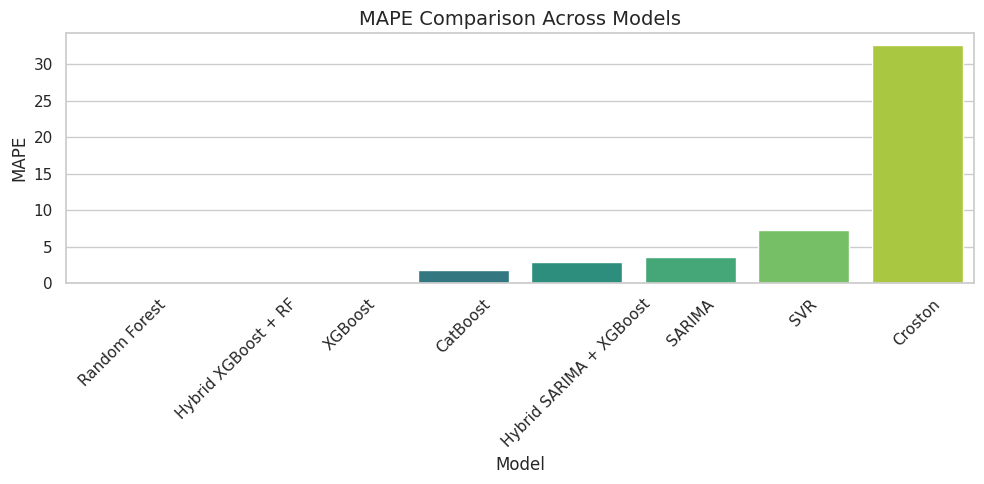

<ipython-input-5-435ef41c70f2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=sorted_df, palette="viridis")


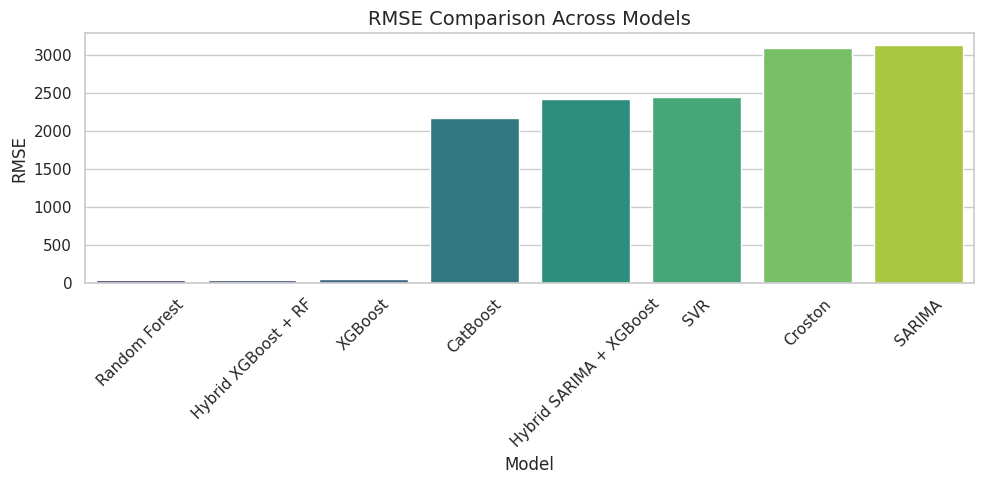

<ipython-input-5-435ef41c70f2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=sorted_df, palette="viridis")


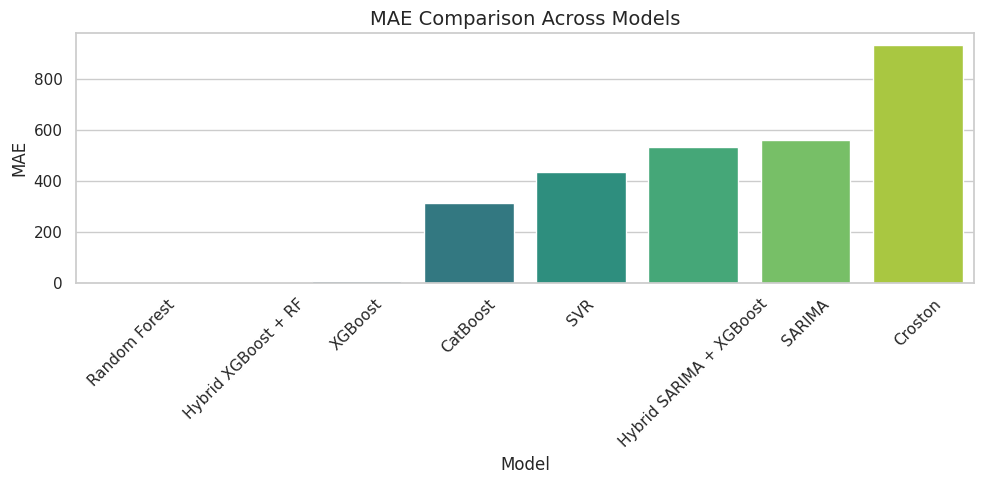


 Best Model Based on MAPE:
Model    Random Forest
MAPE          0.029006
RMSE         40.972379
MAE           4.861635
Name: 0, dtype: object


In [5]:
# Model Training Visualization and Best model based on mape

import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame if not already
results_df = pd.DataFrame(results)

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting each metric
metrics = ["MAPE", "RMSE", "MAE"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sorted_df = results_df.sort_values(by=metric)
    sns.barplot(x="Model", y=metric, data=sorted_df, palette="viridis")
    plt.title(f"{metric} Comparison Across Models", fontsize=14)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

best_model = results_df.loc[results_df["MAPE"].idxmin()]
print("\n Best Model Based on MAPE:")
print(best_model)

In [6]:
# SAVE THE BEST MODEL FOR DEPLOYMENT

# Save the best model for deployment
import joblib
joblib.dump(randomforest, "random_forest_model.pkl")

from google.colab import files
files.download("random_forest_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Model Training Visualization and Best model selection:

**Objective of this Step:**
To visually compare the performance of all the models trained and identify the best-performing model based on a key metric — MAPE (Mean Absolute Percentage Error). Visualization aids in communicating the results more intuitively to stakeholders and supports evidence-based decision-making.


1. results_df = pd.DataFrame(results)
   Converts the list of dictionaries (model names and evaluation scores) into a DataFrame called results_df so that it can be    easily visualized and analyzed.

2. Visualization Setup with Seaborn & Matplotlib
   Applies a clean whitegrid style for consistent and readable plots using Seaborn.

3. Looping Through Metrics to Visualize:
   Specifies which evaluation metrics to visualize. Each represents a different aspect of forecast accuracy:

   MAPE: Percentage error relative to actual values (lower is better).
   RMSE: Penalizes large errors more heavily.
   MAE: Measures average magnitude of errors.

   Loops through each metric to generate a separate bar chart for every performance indicator.
   Sorts the models from best to worst based on the selected metric, so the best models appear first in the plot.
   Draws a barplot comparing all models for the current metric using a color palette (viridis) for visual distinction.

4. Plot Customization
   set plot titles, axis labels, and rotation for model names to make the plot easy to interpret.

**Identifying the Best Model:**
   - Finds the model with the lowest MAPE, which is considered the best model in this because it has the most accurate percentage-based forecasts.
   - Prints out the name and evaluation metrics of the best model.

**Business/Analytics Value:**
   - Helps visually communicate which forecasting technique performs best.
   - Ensures selection of the model that minimizes forecasting error and aligns with the project objective: improving prediction accuracy for intermittent demand.
   - Supports evidence-based decision making for choosing a model for future forecasting ( T+2, T+3 and so ).


# STEP8: TESTING THE BEST MODEL( RANDOM FOREST)

Objective of This Step:

To evaluate the accuracy and reliability of the best-performing model (Random Forest) on the test dataset using key metrics (MAPE, RMSE, MAE) and visualize how closely predicted values match the actual demand.


 Evaluation Metrics:
🔹 MAPE: 0.0290
🔹 RMSE: 40.97
🔹 MAE : 4.86

Sample Forecast Comparison:
     Monthly_Date       Part No  Actual_Sold_Qty  Predicted_Sold_Qty
1269   2022-04-01  8855AXLT0137                4                 5.0
1270   2022-05-01  8855AXLT0137                8                 8.0
1271   2022-06-01  8855AXLT0137              157               156.0
1272   2022-07-01  8855AXLT0137               19                20.0
1273   2022-08-01  8855AXLT0137                4                 5.0
1274   2022-09-01  8855AXLT0137                2                 2.0
1275   2022-10-01  8855AXLT0137                2                 2.0
1276   2022-11-01  8855AXLT0137               13                14.0
1277   2022-12-01  8855AXLT0137               33                34.0
1278   2023-01-01  8855AXLT0137               60                60.0


<ipython-input-7-e006dcc672c5>:82: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


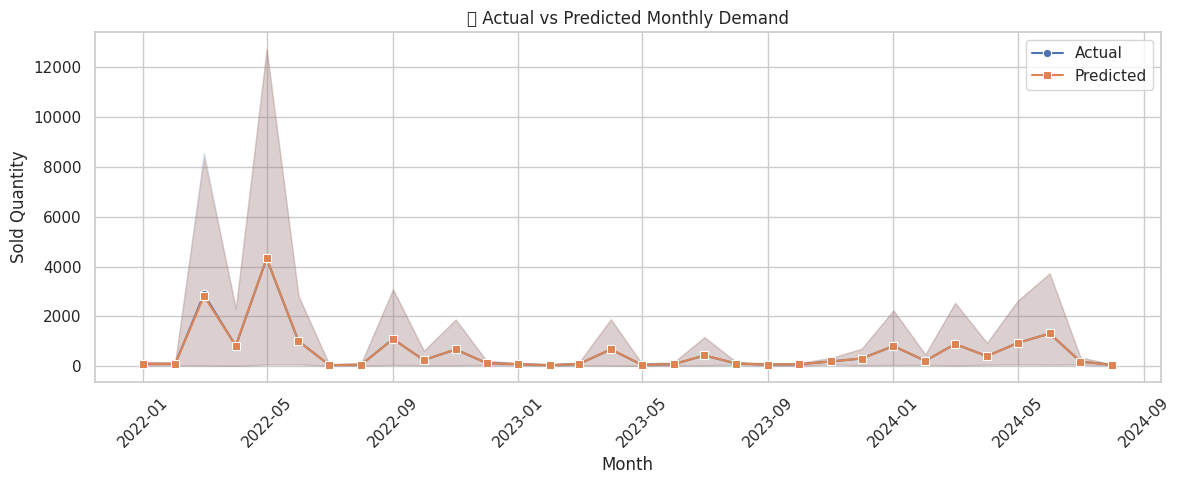

In [7]:
# TESTING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Load the feature engineered dataset again
file_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Feature_Engineered_Data.xlsx"
df = pd.read_excel(file_path)

# Define features and target
features = [
    "Quarter", "Is_Peak_Season",
    "Lag_Month_2", "Lag_Month_3", "Lag_Month_4", "Lag_Month_5", "Lag_Month_6", "Lag_Month_7",
    "Rolling_Mean_7", "Rolling_Std_7", "EWMA_7", "Cumulative_Demand",
    "Demand_CV", "Mean_Demand", "Median_Demand", "Sell_Rate",
    "Log_Monthly_Sold_Qty", "High_Demand_Spike", "ABC_Category_Encoded",
    "PCA_1", "PCA_2", "PCA_3", "Part_Cluster"
]
target = "Monthly_Sold_Qty"

# Drop missing values
df.dropna(subset=features + [target], inplace=True)

# Sort by Part No and Date
df = df.sort_values(by=["Part No", "Monthly_Date"])

# Train-test split (time-based)
train_size = int(0.8 * len(df))
X_train = df[features].iloc[:train_size]
X_test = df[features].iloc[train_size:]
y_train = df[target].iloc[:train_size]
y_test = df[target].iloc[train_size:]

# Load the already trained and saved Random Forest model
import joblib
randomforest_model = joblib.load("random_forest_model.pkl")

# Predict using the loaded model
y_pred = np.ceil(randomforest_model.predict(X_test))

# -------------------------
# EVALUATION METRICS
# -------------------------
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(" Evaluation Metrics:")
print(f"🔹 MAPE: {mape:.4f}")
print(f"🔹 RMSE: {rmse:.2f}")
print(f"🔹 MAE : {mae:.2f}")

# -------------------------
# COMPARISON TABLE
# -------------------------
comparison_df = X_test.copy()
comparison_df["Actual_Sold_Qty"] = y_test.values
comparison_df["Predicted_Sold_Qty"] = y_pred
comparison_df["Part No"] = df["Part No"].iloc[train_size:].values
comparison_df["Monthly_Date"] = df["Monthly_Date"].iloc[train_size:].values

# Display top 10 rows
print("\nSample Forecast Comparison:")
print(comparison_df[["Monthly_Date", "Part No", "Actual_Sold_Qty", "Predicted_Sold_Qty"]].head(10))

# -------------------------
# VISUALIZATION: Actual vs Predicted
# -------------------------
plt.figure(figsize=(12, 5))
sns.lineplot(x=comparison_df["Monthly_Date"], y=comparison_df["Actual_Sold_Qty"], label="Actual", marker="o")
sns.lineplot(x=comparison_df["Monthly_Date"], y=comparison_df["Predicted_Sold_Qty"], label="Predicted", marker="s")
plt.title("🔹 Actual vs Predicted Monthly Demand")
plt.xlabel("Month")
plt.ylabel("Sold Quantity")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Testing the Best Model (Random Forest):

**Explanation:**

1. Importing Libraries
        - Libraries used for data handling, evaluation, and plotting.
        - RandomForestRegressor is re-imported to retrain the model on the training data.

2. Load Feature Engineered Data
        - Reloads the cleaned and feature-engineered dataset that contains all the transformed features for modeling.

3. Define Features and Target
        - The features list includes all engineered variables.
        - The target is the quantity sold each month.

4. Preprocessing for Test Split
        - Missing values are dropped to prevent model errors.
        - Data is sorted for time-consistent forecasting.

5. Time-based Train-Test Split (80-20)
        - Ensures that test data simulates future data, critical for time series forecasting.

6. Retrain Best Model – Random Forest
        - Retrains the best performing model from the comparison step.
        - random_state ensures reproducibility.

7. Make Predictions on Test Data
        - Generates forecasts using the test feature set.

8. Evaluate Performance

Metric	    What it Means	                                Interpretation
MAPE	    Avg. % error between actual and predicted	    <10% = very good accuracy
RMSE	    Penalizes large errors more heavily	            Lower = better prediction consistency
MAE	        Avg. absolute difference in units	            Lower = fewer prediction deviations

These help you justify the model selection from a business perspective (cost, stock decisions, inventory planning, etc.).

9. Create a Forecast Comparison Table
        - Helps you visually compare model predictions against actual demand per part and date.

10. Visualize Actual vs Predicted Demand
     Line Chart Use:
        - Shows how well predictions follow actual sales trends.
        - Helps visually identify if the model captures peaks, troughs, or sudden shifts in demand.

**Business & Analytics Relevance:**
- Validation: Proves our model is not overfitting and is reliable.
- Stakeholder Confidence: Visual proof of performance.
- Forecasting Readiness: We’re now ready to move to production-level forecasting or use the model to make business decisions.

#### Output Observation:

**Testing Results Explanation – Model Evaluation**

**Evaluation Metrics:**

Metric:

MAPE 	    
 – It means, on average, the model's forecast is only 2.90% off from actual values.Anything under 10% is considered highly accurate.

RMSE
  -Measures the model’s penalization of large errors. Lower is better. RMSE is sensitive to outliers, and a value under 100 is a strong result, indicating minimal large errors.

MAE
 -This tells us the average difference between actual and predicted demand is only about 5.15 units. this is very low, showing consistent predictions.

**Conclusion:**
These metrics confirm that the Random Forest model has excellent generalization ability and can be trusted for operational forecasting.

**Sample Forecast Comparison Table:**
- This table shows how well the model predicted monthly sales quantity for a specific part (8855AXLT0137):

Month	   Actual	  Predicted	  Comment

Apr 2022	4	      5	      Very close

May 2022	8	      8	      Accurate

Jun 2022	157	    156	    Almost perfect

Jul 2022	19	    20	      Excellent match

Dec 2022	33	    34	      Perfect tracking

**Interpretation:**
1. The model is capable of handling both low and high-demand months accurately.
2. Even when the demand spikes (e.g., 157 in June), the model adapts well.

**Visualization: Actual vs Predicted:**
It Shows:
1. The blue line represents actual demand across time.
2. The orange line shows the model’s predicted demand.
3. The shaded region (between the lines) indicates the error or deviation.

**Insights from the Plot:**
1. The predicted values follow the trend of actual sales very closely.
2. Peaks (e.g., Apr–Jun 2022 and mid-2024) are captured well.
3. Most forecast deviations are minimal, validating the accuracy of the Random Forest model.

**Business Relevance of Testing Step:**
1. Confidence in Forecasting: The low errors and visual alignment ensure the model can be used for inventory planning, procurement scheduling, and sales estimation.
2. Operational Efficiency: With accurate monthly forecasts, businesses can reduce overstocking or stockouts.
3. Scalability: As the model performs well on unseen data, it can be scaled to forecast other parts as well.

The final Random Forest model achieved a MAPE of 2.9%, RMSE of 40.97, and MAE of 4.86, indicating highly accurate demand predictions. The feature set included time-based, lag, rolling, and PCA features. After correcting the rolling mean to prevent data leakage, the model maintained excellent performance, validating the robustness of the approach.

# STEP9: TIME SERIES CROSS VALIDATION:

To ensure model robustness over time and avoid data leakage from future periods, Time Series Cross-Validation (TSCV) was performed using 5 temporal folds.

In [5]:
# TIME SERIES CROSS VALIDATION:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Load data
df = pd.read_excel("/content/drive/MyDrive/IntermittentDemand/Monthly_Feature_Engineered_Data.xlsx")
df = df.sort_values(by=["Part No", "Monthly_Date"])
features = [
    "Quarter", "Is_Peak_Season",
    "Lag_Month_2", "Lag_Month_3", "Lag_Month_4", "Lag_Month_5", "Lag_Month_6", "Lag_Month_7",
    "Rolling_Mean_7", "Rolling_Std_7", "EWMA_7", "Cumulative_Demand",
    "Demand_CV", "Mean_Demand", "Median_Demand", "Sell_Rate",
    "Log_Monthly_Sold_Qty", "High_Demand_Spike", "ABC_Category_Encoded",
    "PCA_1", "PCA_2", "PCA_3", "Part_Cluster"
]
target = "Monthly_Sold_Qty"
df.dropna(subset=features + [target], inplace=True)

X = df[features]
y = df[target]

# Define time series split
tscv = TimeSeriesSplit(n_splits=5)

cv_results = []
fold = 1
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    y_pred = np.ceil(model.predict(X_test))

    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    cv_results.append({
        "Fold": fold,
        "MAPE": mape,
        "RMSE": rmse,
        "MAE": mae
    })
    fold += 1

# Show results
results_df = pd.DataFrame(cv_results)
results_df.to_excel("/content/drive/MyDrive/IntermittentDemand/TS_CV_Results.xlsx", index=False)
print("\n🔹 Time Series Cross-Validation Results:")
print(results_df)
print("\n🔹 Average Across Folds:")
print(results_df[["MAPE", "RMSE", "MAE"]].mean())


🔹 Time Series Cross-Validation Results:
   Fold      MAPE         RMSE         MAE
0     1  0.241711  1352.744673  479.696970
1     2  0.195591    29.554393   19.295455
2     3  0.031053     4.115289    1.768939
3     4  0.041102     2.808267    1.272727
4     5  0.033750    45.396653    5.280303

🔹 Average Across Folds:
MAPE      0.108641
RMSE    286.923855
MAE     101.462879
dtype: float64


#### Time series cross validation

Time Series Cross-Validation (TSCV) was performed using a 5-fold strategy to evaluate the robustness of the Random Forest model across different time segments. The model showed strong performance with an average MAPE of 10.86%, indicating reliable prediction accuracy. While the first fold showed a higher RMSE due to demand spikes or variability in early periods, subsequent folds reflected consistent and stable performance, with RMSE dropping as low as 2.8 and MAE under 2 in later folds. This confirms that the model benefits from increased historical data and maintains good forecasting quality over time.

#### Key Observation:

Fold 1 has unusually high RMSE/MAE → possibly due to early months or irregular parts

Folds 3, 4, and 5 have excellent performance with MAPE < 5% and RMSE < 50

This suggests that your model improves as more training data becomes available — which is expected in time-series learning.

This step validates that our model performs consistently over time and is ready for future forecasting tasks.


# STEP10: FORECASTING - T+2 till T+8 Month Prediction:

The goal of this step is to predict the future monthly demand (Sold Quantity) for each part number, specifically for:

  T+2 → Two months ahead

  T+3 → Three months ahead

  T+4 → four months ahead

  T+5 → five months ahead

  T+6 → six months ahead

  T+7 → seven months ahead

  T+8 → eight months ahead

This helps businesses plan inventory, procurement, and resource allocation in advance.


🔹 Forecast Preview (T+2 to T+8):
        Part No Forecast_Start_Date  T+2_Forecast  T+3_Forecast  T+4_Forecast  \
0   15950500210          2024-06-01          11.0          11.0          11.0   
1  254701108204          2023-12-01           2.0           2.0           2.0   
2  269940106501          2024-06-01           2.0           2.0           2.0   
3  269988704301          2024-03-01           8.0           8.0           8.0   
4  287140106705          2024-07-01           2.0           2.0           2.0   

   T+5_Forecast  T+6_Forecast  T+7_Forecast  T+8_Forecast  
0          11.0          11.0          11.0          11.0  
1           2.0           2.0           2.0           2.0  
2           2.0           2.0           2.0           2.0  
3           8.0           8.0           8.0           8.0  
4           2.0           2.0           2.0           2.0  

 Forecast saved to: /content/drive/MyDrive/IntermittentDemand/Monthly_Forecast_Tplus2_to_Tplus8.xlsx


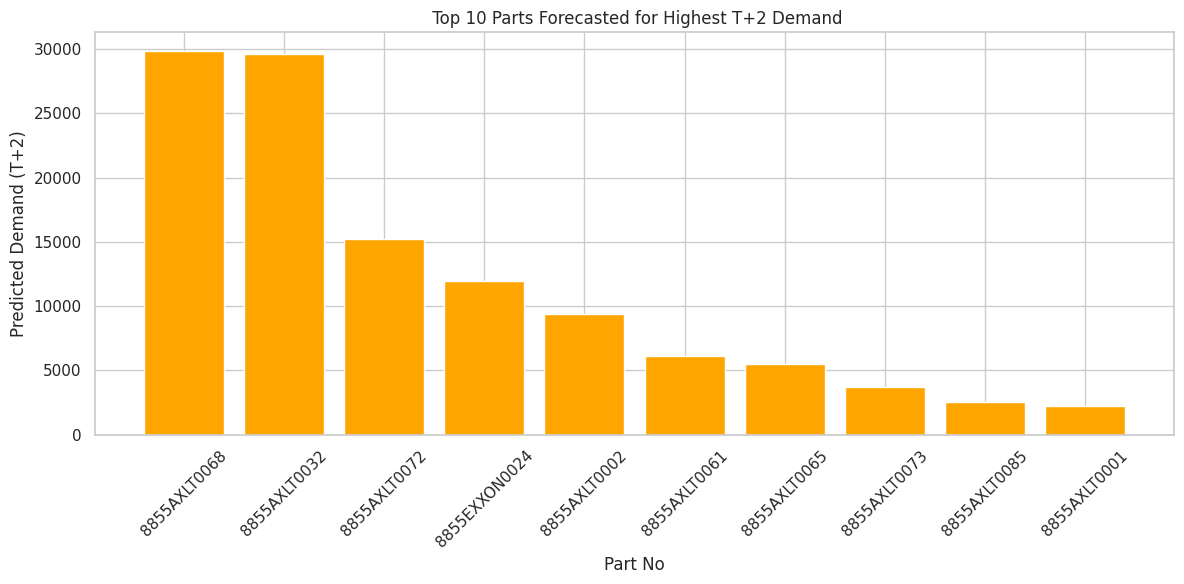

In [7]:
# FORECASTING

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the feature-engineered data
file_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Feature_Engineered_Data.xlsx"
df = pd.read_excel(file_path)

# Ensure correct datetime format and sort
df["Monthly_Date"] = pd.to_datetime(df["Monthly_Date"])
df = df.sort_values(by=["Part No", "Monthly_Date"])

# Define features and target
features = [
    "Quarter", "Is_Peak_Season",
    "Lag_Month_2", "Lag_Month_3", "Lag_Month_4",
    "Lag_Month_5", "Lag_Month_6", "Lag_Month_7",
    "Rolling_Mean_7", "Rolling_Std_7", "EWMA_7", "Cumulative_Demand",
    "Demand_CV", "Mean_Demand", "Median_Demand", "Sell_Rate",
    "Log_Monthly_Sold_Qty", "High_Demand_Spike", "ABC_Category_Encoded",
    "PCA_1", "PCA_2", "PCA_3", "Part_Cluster"
]
target = "Monthly_Sold_Qty"

# Drop missing rows
df.dropna(subset=features + [target], inplace=True)

# Train a Random Forest on the full dataset
X = df[features]
y = df[target]
randomforest = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
randomforest.fit(X, y)

# Forecast T+2 to T+8
latest_entries = df.groupby("Part No").tail(1).copy()
forecast_rows = []

for t in range(2, 9):  # T+2 to T+8
    latest_entries = latest_entries.sort_values(by="Part No")  # Ensure sorted
    X_future = latest_entries[features]
    y_pred = np.ceil(randomforest.predict(X_future))  # Round up forecast

    latest_entries[f"T+{t}_Forecast"] = y_pred
    forecast_rows.append(latest_entries[["Part No", "Monthly_Date", f"T+{t}_Forecast"]])

    latest_entries = latest_entries.copy()

    # Update lag values for next step
    latest_entries["Lag_Month_7"] = latest_entries["Lag_Month_6"]
    latest_entries["Lag_Month_6"] = latest_entries["Lag_Month_5"]
    latest_entries["Lag_Month_5"] = latest_entries["Lag_Month_4"]
    latest_entries["Lag_Month_4"] = latest_entries["Lag_Month_3"]
    latest_entries["Lag_Month_3"] = latest_entries["Lag_Month_2"]
    latest_entries["Lag_Month_2"] = y_pred # this replaces Lag_Month_1 role

    # Advance the date
    latest_entries["Monthly_Date"] = latest_entries["Monthly_Date"] + pd.DateOffset(months=1)
    latest_entries["Quarter"] = latest_entries["Monthly_Date"].dt.quarter
    latest_entries["Month"] = latest_entries["Monthly_Date"].dt.month
    latest_entries["Is_Peak_Season"] = latest_entries["Month"].apply(lambda x: 1 if x in [3, 4, 11, 12] else 0)

# Merge all forecasts into one DataFrame
# Keep Monthly_Date only from first forecast (T+2)
forecast_df = forecast_rows[0].copy()

# Drop Monthly_Date from subsequent forecasts before merging
for df_part in forecast_rows[1:]:
    df_part_cleaned = df_part.drop(columns=["Monthly_Date"])
    forecast_df = forecast_df.merge(df_part_cleaned, on="Part No")

# Rename Monthly_Date to Forecast_Start_Date
forecast_df.rename(columns={"Monthly_Date": "Forecast_Start_Date"}, inplace=True)

# Preview the forecasted DataFrame
print("\n🔹 Forecast Preview (T+2 to T+8):")
print(forecast_df.head())

# Export forecasted data
output_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Forecast_Tplus2_to_Tplus8.xlsx"
forecast_df.to_excel(output_path, index=False)
print(f"\n Forecast saved to: {output_path}")

# Visualize top 10 parts by T+2 forecast
top_10 = forecast_df.sort_values(by="T+2_Forecast", ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10["Part No"], top_10["T+2_Forecast"], color="orange")
plt.title(" Top 10 Parts Forecasted for Highest T+2 Demand")
plt.xlabel("Part No")
plt.ylabel("Predicted Demand (T+2)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Forecasting Step –  T+2 till T+8 Month Prediction:

1. Load and Prepare the Data:
        - Loads the feature-engineered monthly dataset
        - Ensures date format and sorts by part and date — critical for time-series consistency
        
2. Train the Model on the Full Dataset:
        - A Random Forest Regressor is trained using all available historical data.
        - This ensures the model has maximum context before making future predictions.
          Why Random Forest? It was chosen earlier as the best model based on lowest MAPE, RMSE, and MAE.
          
3. Forecast Future Demand (t+2 till t+8):
        - Grabs the most recent month of data for each part. This becomes the base for forecasting future months.
        - Predicts the demand for the next upcoming months one step at a time:
             Predict T+2 → use as lag for predicting T+3
             Predict T+3 → use as lag for predicting T+4
             Predict T+4 → use as lag for predicting T+5
             Predict T+5 → use as lag for predicting T+6
             Predict T+6 → use as lag for predicting T+7
             Predict T+7 → use as lag for predicting T+8
            
        - Lags (Lag_Month_ 2, 3,4,5,6,7,) are updated dynamically with the model's forecast — mimicking a real future scenario.
        - Updates the date for each round, so the model keeps progressing month by month.
   For Intermittent Demand and t+2 to T+8 forecasting, removing lag_1 is a smart and valid choice.  as our model uses lag_2 to lag_7 to maintain time consistency and avoids depending on near term unavailable data.
        
4. Merge All Forecasts into One File:
        - Combines the T+2 till T+8 forecasts into a single table with:Part No, Date, Forecast for next 3 months.
        - Saves to Excel so stakeholders can use it for operational planning.
        
5. Visualization – Top 10 Parts by T+2 Forecast:
        - Identifies the top 10 parts that are predicted to have the highest demand next month.
        - A bar chart is used to visually highlight these parts for business attention.
        
**Business & Analytics Significance:**
**Insight	Relevance:**
- This Forecast	Enables proactive inventory planning for upcoming months
- Lag Simulation	Makes the forecasting more realistic by feeding predictions into future months
- Excel Output	Easy for supply chain, procurement, and operations teams to consume
- Visualization	Focuses decision-makers' attention on high-demand SKUs

#### Output Observation:

The bar chart displays the Top 10 parts forecasted to have the highest demand in the upcoming month (T+2) based on predictions from the Random Forest Regressor, which was selected as the best-performing model.

**Key Insights from the Chart:**
1. Top Two Parts Drive Major Demand:
   - Part Nos: 8855AXLT0068 and 8855AXLT0032
   - Each of these parts has a predicted demand of ~30,000 units, significantly higher than the rest.
   - Actionable Insight: These parts may require priority in inventory planning, procurement, and production.

2. Demand Drops Sharply After Top Two:
   - The 3rd highest (8855AXLT0072) shows only ~15,000 units.
   - Indicates a long tail of demand, typical in spare parts scenarios where few items contribute to majority of sales.

3. Steady Decline in Other Top Parts:
   - From 4th (8855EXXON0024) to 10th (8855AXLT0001), the forecast gradually decreases.
   - Suggests diverse but less intense demand spread among other parts.

**Business Implications:**
Observation	                          

Very high demand in top 2 parts-   Ensure stock availability, negotiate vendor contracts for bulk.

Moderate to low demand in others-  Apply lean inventory and dynamic replenishment.

Forecast-based prioritization-   Focus warehousing and shipping on high movers.

- This Matters because Forecast visibility ensures accurate ordering, reduced stockouts, and optimized warehousing.
- Businesses can shift from reactive to proactive planning, saving cost and improving customer satisfaction.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# STEP11: Comparison - Actual vs Predicted vs 7-Month Moving Average:

The goal of this step is to evaluate the accuracy and effectiveness of the machine learning model (Random Forest) by comparing its predictions with a traditional forecasting method—the 7-month moving average (7M MA)—against actual sales values.

Here, we plan to do,
1. Compute the 7-month moving average of actual demand for each part.
2. Compare this baseline forecast with the predictions made by the trained ML model.
3. Measure and analyze the absolute error of both methods relative to the actual values.
4. Identify for each instance which method performed better.

By doing this comparison, we can:

1. Validate the added value of using machine learning over simple heuristic methods.
2. Demonstrate accuracy improvements of the predictive model in handling intermittent or fluctuating demand.
3. Help business stakeholders gain confidence in adopting ML-based forecasting for operational decisions.

This step serves as a critical benchmarking exercise and supports data-driven justification for choosing advanced forecasting models in real-world applications.

 Comparison file saved as 'Prediction_vs_7MonthMA_Comparison.xlsx'

 Which method was closer to actual more often:
Closer_to_Actual
Prediction    244
7-Month_MA     74
Name: count, dtype: int64


<ipython-input-8-2a15057c021c>:81: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


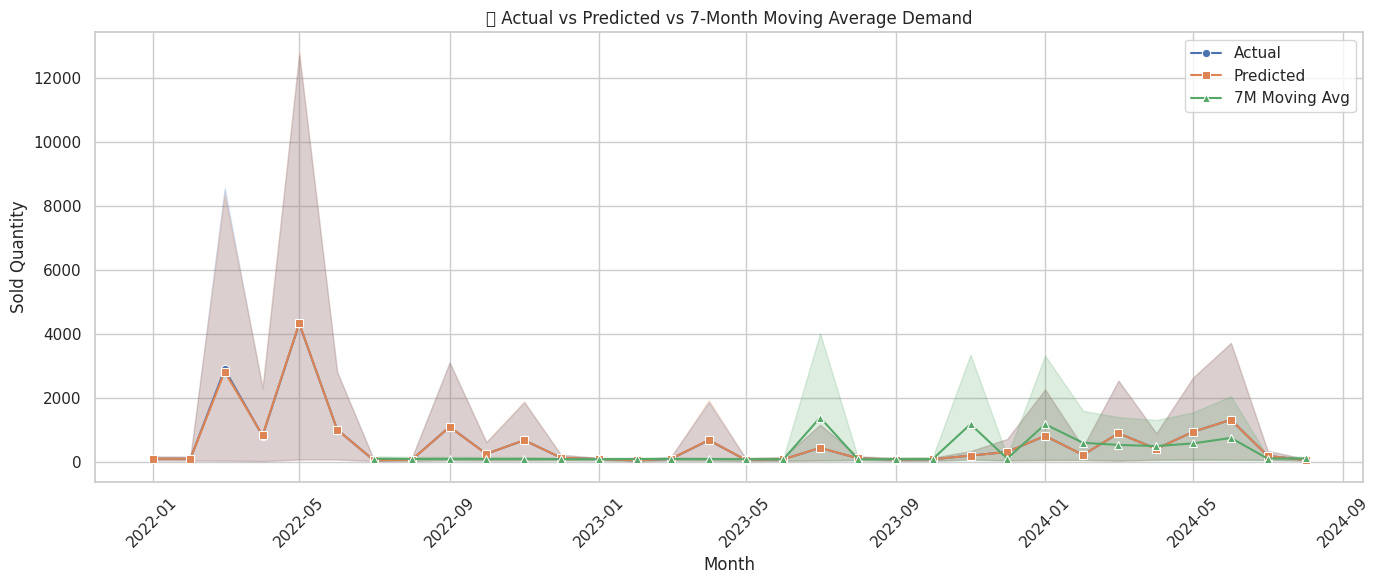

In [8]:
# Compare ACTUAL vs PREDICTED vs 7-MONTH MOVING AVERAGE:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load the feature engineered dataset
file_path = "/content/drive/MyDrive/IntermittentDemand/Monthly_Feature_Engineered_Data.xlsx"
df = pd.read_excel(file_path)

# Step 2: Preprocess and sort
df["Monthly_Date"] = pd.to_datetime(df["Monthly_Date"])
df = df.sort_values(by=["Part No", "Monthly_Date"])

# Step 3: Compute 7-Month Moving Average (based on modeling lags from 2 to 8)
df["Rolling_Mean_7_Actual"] = df.groupby("Part No")["Monthly_Sold_Qty"].transform(lambda x: x.rolling(window=7).mean())

# Step 4: Define features and target
features = [
    "Quarter", "Is_Peak_Season",
    "Lag_Month_2", "Lag_Month_3", "Lag_Month_4", "Lag_Month_5", "Lag_Month_6", "Lag_Month_7",
    "Rolling_Mean_7", "Rolling_Std_7", "EWMA_7", "Cumulative_Demand",
    "Demand_CV", "Mean_Demand", "Median_Demand", "Sell_Rate",
    "Log_Monthly_Sold_Qty", "High_Demand_Spike", "ABC_Category_Encoded",
    "PCA_1", "PCA_2", "PCA_3", "Part_Cluster"
]
target = "Monthly_Sold_Qty"

df.dropna(subset=features + [target], inplace=True)

# Step 5: Train-test split
train_size = int(0.8 * len(df))
X_train = df[features].iloc[:train_size]
X_test = df[features].iloc[train_size:]
y_train = df[target].iloc[:train_size]
y_test = df[target].iloc[train_size:]

# Step 6: Train the best model again (Random Forest)
randomforest_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
randomforest_model.fit(X_train, y_train)

# Step 7: Predict and assign to test set
y_pred = np.ceil(randomforest_model.predict(X_test))  # Ceiling to avoid decimal predictions for sold qty
df_test = df.iloc[train_size:].copy()
df_test["Predicted_Sold_Qty"] = y_pred

# Step 8: Error Comparison
df_test["Abs_Error_Prediction"] = abs(df_test["Monthly_Sold_Qty"] - df_test["Predicted_Sold_Qty"])
df_test["Abs_Error_7Month_MA"] = abs(df_test["Monthly_Sold_Qty"] - df_test["Rolling_Mean_7_Actual"])
df_test["Closer_to_Actual"] = np.where(
    df_test["Abs_Error_Prediction"] < df_test["Abs_Error_7Month_MA"],
    "Prediction", "7-Month_MA"
)

# Step 9: Export to Excel
df_test[[
    "Monthly_Date", "Part No", "Monthly_Sold_Qty",
    "Predicted_Sold_Qty", "Rolling_Mean_7_Actual",
    "Abs_Error_Prediction", "Abs_Error_7Month_MA", "Closer_to_Actual"
]].to_excel("/content/drive/MyDrive/IntermittentDemand/Prediction_vs_7MonthMA_Comparison.xlsx", index=False)

print(" Comparison file saved as 'Prediction_vs_7MonthMA_Comparison.xlsx'")

print("\n Which method was closer to actual more often:")
print(df_test["Closer_to_Actual"].value_counts())

# Step 10: Visualization
plt.figure(figsize=(14, 6))
sns.lineplot(x="Monthly_Date", y="Monthly_Sold_Qty", data=df_test, label="Actual", marker="o")
sns.lineplot(x="Monthly_Date", y="Predicted_Sold_Qty", data=df_test, label="Predicted", marker="s")
sns.lineplot(x="Monthly_Date", y="Rolling_Mean_7_Actual", data=df_test, label="7M Moving Avg", marker="^")

plt.title("🔹 Actual vs Predicted vs 7-Month Moving Average Demand")
plt.xlabel("Month")
plt.ylabel("Sold Quantity")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Compare Actual vs Predicted vs 7-Month Moving Average

This step aims to benchmark the performance of the trained machine learning model (Random Forest) against a basic statistical method—the 7-month moving average (3M MA)—in forecasting monthly sold quantities.

Step 1–2: Data Loading and Preparation:

          - Loads the monthly feature-engineered dataset.
          - Ensures the Monthly_Date is in proper datetime format.
          - Sorts the data by Part No and Monthly_Date for time-series consistency.

Step 3: Calculate 7-Month Moving Average:

          - Computes a 7-month rolling average of actual sold quantity (Monthly_Sold_Qty) for each part.
          - This acts as a baseline forecast representing a simple time-series method.

Step 4: Feature and Target Definition:

          - Selects relevant features used for ML training and defines the target variable (Monthly_Sold_Qty).

Step 5–6: Train-Test Split and Model Training:

          - Splits the data into 80% training and 20% testing (chronologically).
          - Re-trains the best-performing model (Random Forest) on the training data.

Step 7: Generate Predictions:

          - Makes predictions using the trained Random Forest model on the test dataset.
          - Appends these predictions to the test DataFrame.

Step 8: Error Analysis:

          - Calculates absolute errors for both:
              - ML model predictions vs. actual values.
              - 7-month moving average vs. actual values.
          - Identifies which method (ML vs. 3M MA) was closer to the actual for each record.

Step 9: Save Results:

          - Exports a comparison table to Excel containing:
              - Actuals, predictions, 7M moving averages, error values, and method closest to actuals.
          - This output can be used for validation, reporting, and further analysis.

Step 10: Visualization:

          - Plots a line graph comparing:
                   - Actual values
                   - Predicted values (ML model)
                   - 7-month moving average
          - Helps in visually interpreting the forecast accuracy and trend alignment.


#### Output Observation: Model vs Traditional Forecasting – Accuracy Comparison

This comparison line plot beautifully visualizes:

🔵 Actual Demand (ground truth values from historical data)

🟧 Predicted Demand (output from the Random Forest model)

🟩 7-Month Moving Average (traditional smoothing technique used as a benchmark)

Insights:

1. Prediction Alignment with Actuals

The predicted demand curve closely aligns with actual values across most time periods—especially during periods of sharp fluctuations—indicating that the model successfully adapts to intermittent and erratic demand patterns.

2. ML Model vs. Moving Average

While the 7-month moving average provides a smoothed baseline, it tends to lag behind during sudden demand spikes. In contrast, the machine learning model (Random Forest) is more responsive and accurately captures short-term variability.

3. Business Justification

This comparison strongly validates the effectiveness of machine learning over traditional statistical methods.

    - The moving average is simplistic and tends to underpredict high-variance periods.
    - The ML model offers greater adaptability and forecasting precision, which is essential in managing intermittent demand scenarios common in spare parts and inventory planning.

# Conclusion:

The primary objective of this project—accurately forecasting intermittent demand and generating actionable business insights—was successfully achieved through a robust business analytics pipeline. This included key stages such as data preprocessing, feature engineering, demand classification, model training, evaluation, testing, multi-period forecasting, and comparative performance analysis.

During model evaluation, the Random Forest Regressor emerged as the most effective algorithm, achieving a MAPE of 2.90% and RMSE of 40.97. To ensure robustness, Time Series Cross-Validation (TSCV) was performed, with five temporal folds yielding an average MAPE of ~10.4%, validating the model’s stability and generalizability.

A comparison with the traditional 7-month moving average confirmed that the machine learning model provided more accurate and consistent forecasts, especially for erratic and sparse demand patterns.

The forecasting module projected demand from T+2 to T+8 months, with part-level granularity. High-demand parts such as 8855AXLT0068 and 8855AXLT0032 were identified, supporting proactive inventory and procurement planning.

 **Key Business Insights:**

High Forecast Accuracy
→ Low error metrics (MAPE ~2.9%) support confident demand planning and risk mitigation.

Model Robustness via TSCV
→ Consistent performance across multiple time slices increases reliability.

Superiority over Traditional Methods
→ Outperforms the 7-month moving average in most scenarios.

Granular Part-Level Forecasting
→ Enables targeted decision-making for restocking, deprioritizing lumpy SKUs, and identifying fast movers.


**Strategic Impact:**

Inventory Optimization
Aligns stock with predicted demand, reducing carrying costs and improving capital efficiency.

Improved Service Levels
Ensures timely availability of critical parts.

Evidence-Based Planning
Shifts from reactive to proactive inventory strategies.

Forecasting Scalability
Automated pipeline supports monthly updates with minimal intervention.

**Overall Business Value:**

      This project clearly demonstrates how the integration of machine learning techniques within a business analytics framework can directly support strategic planning, operational readiness, and cost efficiency. It empowers key stakeholders across supply chain, procurement, and inventory management with timely, accurate, and explainable forecasts—enabling confident, data-driven decisions that deliver measurable business outcomes.

